In [1]:
import warnings
import itertools
import numpy as np
from numpy import log
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import calendar
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.stattools import adfuller
import random
import sqlite3
from itertools import cycle, islice
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from xgboost import XGBRegressor
import catboost as cb
import lightgbm as lgb
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
# Import timedelta from datetime library
from datetime import timedelta


ss = StandardScaler()

In [2]:
walmart = pd.read_csv('C:\\Users\\rayap\\OneDrive\\Desktop\\SET Project ML\\train.csv')

walmart_feature = pd.read_csv('C:\\Users\\rayap\\OneDrive\\Desktop\\SET Project ML\\features.csv')

walmart_store = pd.read_csv('C:\\Users\\rayap\\OneDrive\\Desktop\\SET Project ML\\stores.csv')

In [3]:
walmart_store

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [4]:
walmart_feature


Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [5]:
walmart


Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]

In [6]:
walmart.head()



Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [7]:
walmart


Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]

In [8]:
walmart_store_group=walmart.groupby(["Store","Date"])[["Weekly_Sales"]].sum()
walmart_store_group.reset_index(inplace=True)

In [9]:
result = pd.merge(walmart_store_group, walmart_store, how='inner', on='Store', left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)

data = pd.merge(result, walmart_feature, how='inner', on=['Store','Date'], left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)

In [10]:
result

Store        Date  Weekly_Sales Type    Size
0         1  2010-02-05    1643690.90    A  151315
1         1  2010-02-12    1641957.44    A  151315
2         1  2010-02-19    1611968.17    A  151315
3         1  2010-02-26    1409727.59    A  151315
4         1  2010-03-05    1554806.68    A  151315
...     ...         ...           ...  ...     ...
6430     45  2012-09-28     713173.95    B  118221
6431     45  2012-10-05     733455.07    B  118221
6432     45  2012-10-12     734464.36    B  118221
6433     45  2012-10-19     718125.53    B  118221
6434     45  2012-10-26     760281.43    B  118221

[6435 rows x 5 columns]

In [11]:
data

Store        Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0         1  2010-02-05    1643690.90    A  151315        42.31       2.572   
1         1  2010-02-12    1641957.44    A  151315        38.51       2.548   
2         1  2010-02-19    1611968.17    A  151315        39.93       2.514   
3         1  2010-02-26    1409727.59    A  151315        46.63       2.561   
4         1  2010-03-05    1554806.68    A  151315        46.50       2.625   
...     ...         ...           ...  ...     ...          ...         ...   
6430     45  2012-09-28     713173.95    B  118221        64.88       3.997   
6431     45  2012-10-05     733455.07    B  118221        64.89       3.985   
6432     45  2012-10-12     734464.36    B  118221        54.47       4.000   
6433     45  2012-10-19     718125.53    B  118221        56.47       3.969   
6434     45  2012-10-26     760281.43    B  118221        58.85       3.882   

      MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0           NaN        NaN        NaN        NaN        NaN  211.096358   
1           NaN        NaN        NaN        NaN        NaN  211.242170   
2           NaN        NaN        NaN        NaN        NaN  211.289143   
3           NaN        NaN        NaN        NaN        NaN  211.319643   
4           NaN        NaN        NaN        NaN        NaN  211.350143   
...         ...        ...        ...        ...        ...         ...   
6430    4556.61      20.64       1.50    1601.01    3288.25  192.013558   
6431    5046.74        NaN      18.82    2253.43    2340.01  192.170412   
6432    1956.28        NaN       7.89     599.32    3990.54  192.327265   
6433    2004.02        NaN       3.18     437.73    1537.49  192.330854   
6434    4018.91      58.08     100.00     211.94     858.33  192.308899   

      Unemployment  IsHoliday  
0            8.106      False  
1            8.106       True  
2            8.106      False  
3            8.106      False  
4            8.106      False  
...            ...        ...  
6430         8.684      False  
6431         8.667      False  
6432         8.667      False  
6433         8.667      False  
6434         8.667      False  

[6435 rows x 15 columns]

In [12]:
data.head()

Store        Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1  2010-02-05    1643690.90    A  151315        42.31       2.572   
1      1  2010-02-12    1641957.44    A  151315        38.51       2.548   
2      1  2010-02-19    1611968.17    A  151315        39.93       2.514   
3      1  2010-02-26    1409727.59    A  151315        46.63       2.561   
4      1  2010-03-05    1554806.68    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday  
0         8.106      False  
1         8.106       True  
2         8.106      False  
3         8.106      False  
4         8.106      False

In [13]:
data['IsHoliday'] = data['IsHoliday'].apply(lambda x: 1 if x == True else 0)

In [14]:
data.dtypes


Store             int64
Date             object
Weekly_Sales    float64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday         int64
dtype: object

In [15]:
data["Date"]=pd.to_datetime(data.Date)
# Extracting details from date given. so that can be used for seasonal checks or grouping

data["Day"]=data.Date.dt.day
data["Month"]=data.Date.dt.month
data["Year"]=data.Date.dt.year

# Changing the Months value from numbers to real values like Jan, Feb to Dec
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

In [16]:
data.isnull().sum()


Store              0
Date               0
Weekly_Sales       0
Type               0
Size               0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Day                0
Month              0
Year               0
dtype: int64

In [17]:
data.describe().T


count          mean            std         min         25%  \
Store         6435.0  2.300000e+01      12.988182       1.000      12.000   
Weekly_Sales  6435.0  1.046965e+06  564366.622054  209986.250  553350.105   
Size          6435.0  1.302876e+05   63117.022465   34875.000   70713.000   
Temperature   6435.0  6.066378e+01      18.444933      -2.060      47.460   
Fuel_Price    6435.0  3.358607e+00       0.459020       2.472       2.933   
MarkDown1     2280.0  6.855587e+03    8183.310015       0.270    1679.190   
MarkDown2     1637.0  3.218966e+03    9268.082387    -265.760      37.200   
MarkDown3     2046.0  1.349853e+03    9287.242800     -29.100       4.700   
MarkDown4     1965.0  3.303858e+03    6211.203947       0.220     483.270   
MarkDown5     2295.0  4.435262e+03    5868.933325     135.160    1702.565   
CPI           6435.0  1.715784e+02      39.356712     126.064     131.735   
Unemployment  6435.0  7.999151e+00       1.875885       3.879       6.891   
IsHoliday     6435.0  6.993007e-02       0.255049       0.000       0.000   
Day           6435.0  1.567832e+01       8.755780       1.000       8.000   
Year          6435.0  2.010965e+03       0.797019    2010.000    2010.000   

                        50%           75%           max  
Store             23.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  960746.040000  1.420159e+06  3.818686e+06  
Size          126512.000000  2.023070e+05  2.196220e+05  
Temperature       62.670000  7.494000e+01  1.001400e+02  
Fuel_Price         3.445000  3.735000e+00  4.468000e+00  
MarkDown1       4972.590000  8.873583e+03  8.864676e+04  
MarkDown2        187.040000  1.785290e+03  1.045195e+05  
MarkDown3         22.700000  9.998750e+01  1.416306e+05  
MarkDown4       1419.420000  3.496080e+03  6.747485e+04  
MarkDown5       3186.520000  5.422080e+03  1.085193e+05  
CPI              182.616521  2.127433e+02  2.272328e+02  
Unemployment       7.874000  8.622000e+00  1.431300e+01  
IsHoliday          0.000000  0.000000e+00  1.000000e+00  
Day               16.000000  2.300000e+01  3.100000e+01  
Year            2011.000000  2.012000e+03  2.012000e+03

In [18]:
#add a 'week' column to the dataset for further analysis
data['Week'] = data.Date.dt.isocalendar().week 

In [19]:
                             ##EDA





In [20]:
data.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')



In [21]:
df_weeks = data.groupby('Week').sum()

import plotly.express as px
fig = px.line( data_frame = df_weeks, x = df_weeks.index, y = 'Weekly_Sales', labels = {'Weekly_Sales' : 'Weekly Sales', 'x' : 'Weeks' }, title = 'Sales over weeks')
fig.update_traces(line_color='red', line_width=3)

In [22]:
df_weeks.max()


Store           3.105000e+03
Weekly_Sales    1.579297e+08
Size            1.758883e+07
Temperature     1.089378e+04
Fuel_Price      4.868670e+02
MarkDown1       1.624212e+06
MarkDown2       1.770822e+06
MarkDown3       2.400306e+06
MarkDown4       1.286593e+06
MarkDown5       7.953985e+05
CPI             2.332123e+04
Unemployment    1.098848e+03
IsHoliday       1.350000e+02
Day             3.870000e+03
Year            2.714850e+05
dtype: float64

In [23]:
import plotly.graph_objs as go
from plotly import tools

fig = go.Figure()

#fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['Weekly_Sales'], name = 'Weekly Sales', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown1'], name = 'MarkDown1', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown2'], name = 'MarkDown2', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown3'], name = 'MarkDown3', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown4'], name = 'MarkDown4', mode = 'lines') )
fig.add_trace(go.Scatter( x = df_weeks.index, y = df_weeks['MarkDown5'], name = 'MarkDown5', mode = 'lines') )

fig.update_layout(title = 'Sales vs Markdown', xaxis_title = 'Weeks',yaxis_title='Sales')

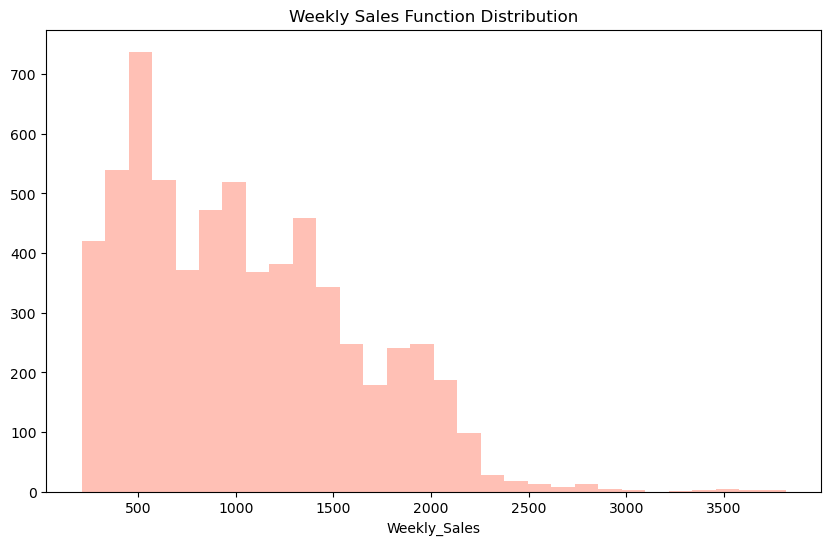

In [24]:
## setting all missing values in markdown columns to -500 for now. We will treat them later while performing Feature scaling
data['MarkDown1'].fillna(-500, inplace=True)
data['MarkDown2'].fillna(-500, inplace=True)
data['MarkDown3'].fillna(-500, inplace=True)
data['MarkDown4'].fillna(-500, inplace=True)
data['MarkDown5'].fillna(-500, inplace=True)


# From the Describe function we see that weekly sales for each store are very high. 
# we will scale down the value for ease of use and revert back when we look residuals or where necessary

plt.figure(figsize=(10, 6))
data["Weekly_Sales"]=data.Weekly_Sales/1000

sns.distplot(data.Weekly_Sales, kde=False, bins=30, color = 'tomato')
plt.title('Weekly Sales Function Distribution')
plt.show()

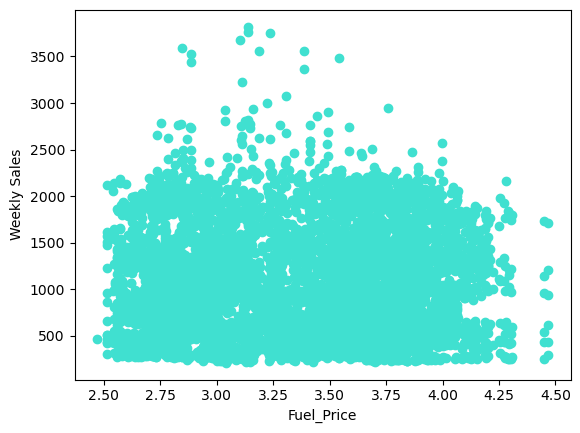

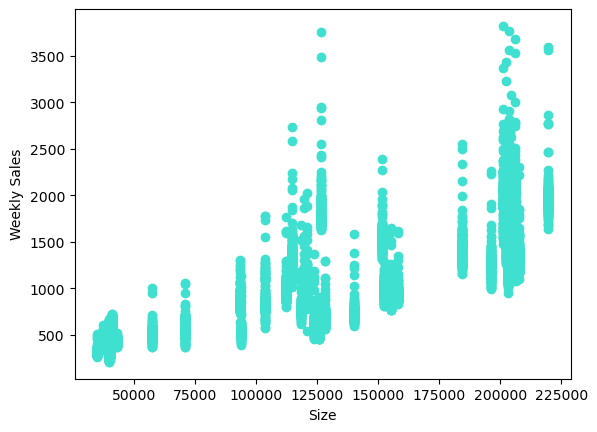

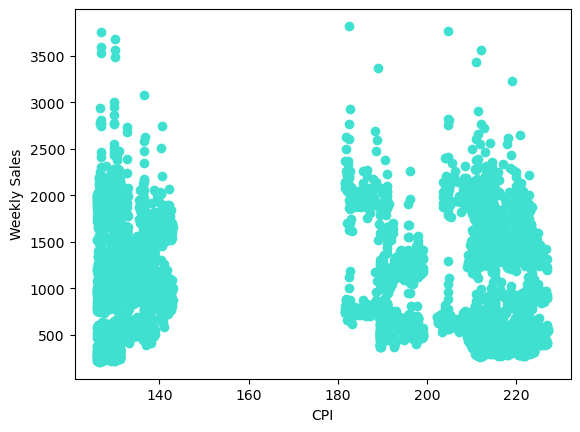

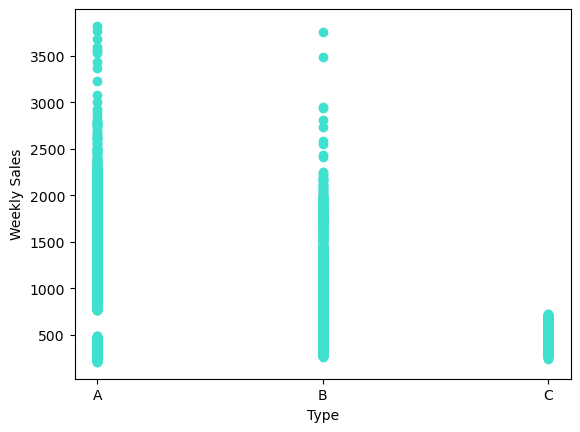

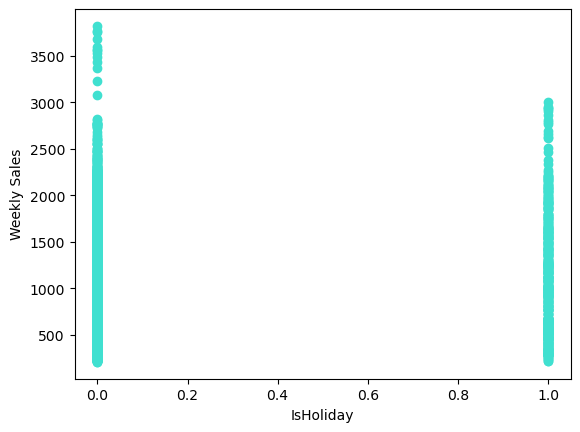

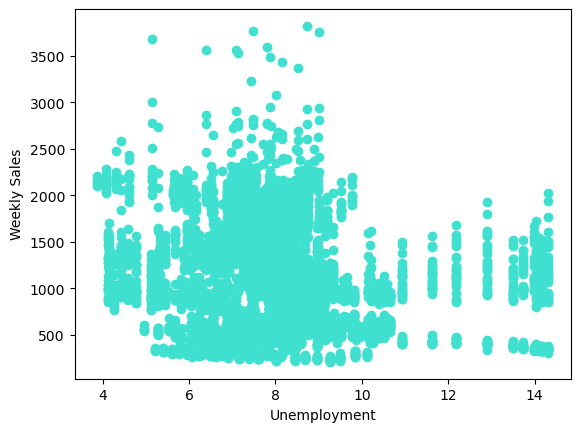

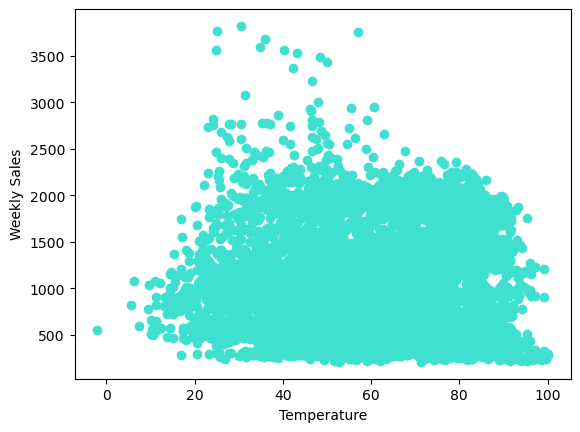

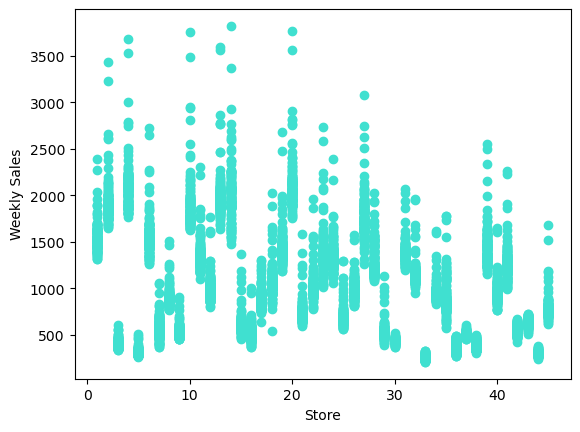

In [25]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(data[column] , data['Weekly_Sales'], color = 'turquoise')
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)
    
scatter(data, 'Fuel_Price')
scatter(data, 'Size')
scatter(data, 'CPI')
scatter(data, 'Type')
scatter(data, 'IsHoliday')
scatter(data, 'Unemployment')
scatter(data, 'Temperature')
scatter(data, 'Store')

In [26]:
data['Week'] = data.Date.dt.isocalendar().week
data.head()

Store       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1 2010-02-05    1643.69090    A  151315        42.31       2.572   
1      1 2010-02-12    1641.95744    A  151315        38.51       2.548   
2      1 2010-02-19    1611.96817    A  151315        39.93       2.514   
3      1 2010-02-26    1409.72759    A  151315        46.63       2.561   
4      1 2010-03-05    1554.80668    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0     -500.0     -500.0     -500.0     -500.0     -500.0  211.096358   
1     -500.0     -500.0     -500.0     -500.0     -500.0  211.242170   
2     -500.0     -500.0     -500.0     -500.0     -500.0  211.289143   
3     -500.0     -500.0     -500.0     -500.0     -500.0  211.319643   
4     -500.0     -500.0     -500.0     -500.0     -500.0  211.350143   

   Unemployment  IsHoliday  Day Month  Year  Week  
0         8.106          0    5   Feb  2010     5  
1         8.106          1   12   Feb  2010     6  
2         8.106          0   19   Feb  2010     7  
3         8.106          0   26   Feb  2010     8  
4         8.106          0    5   Mar  2010     9

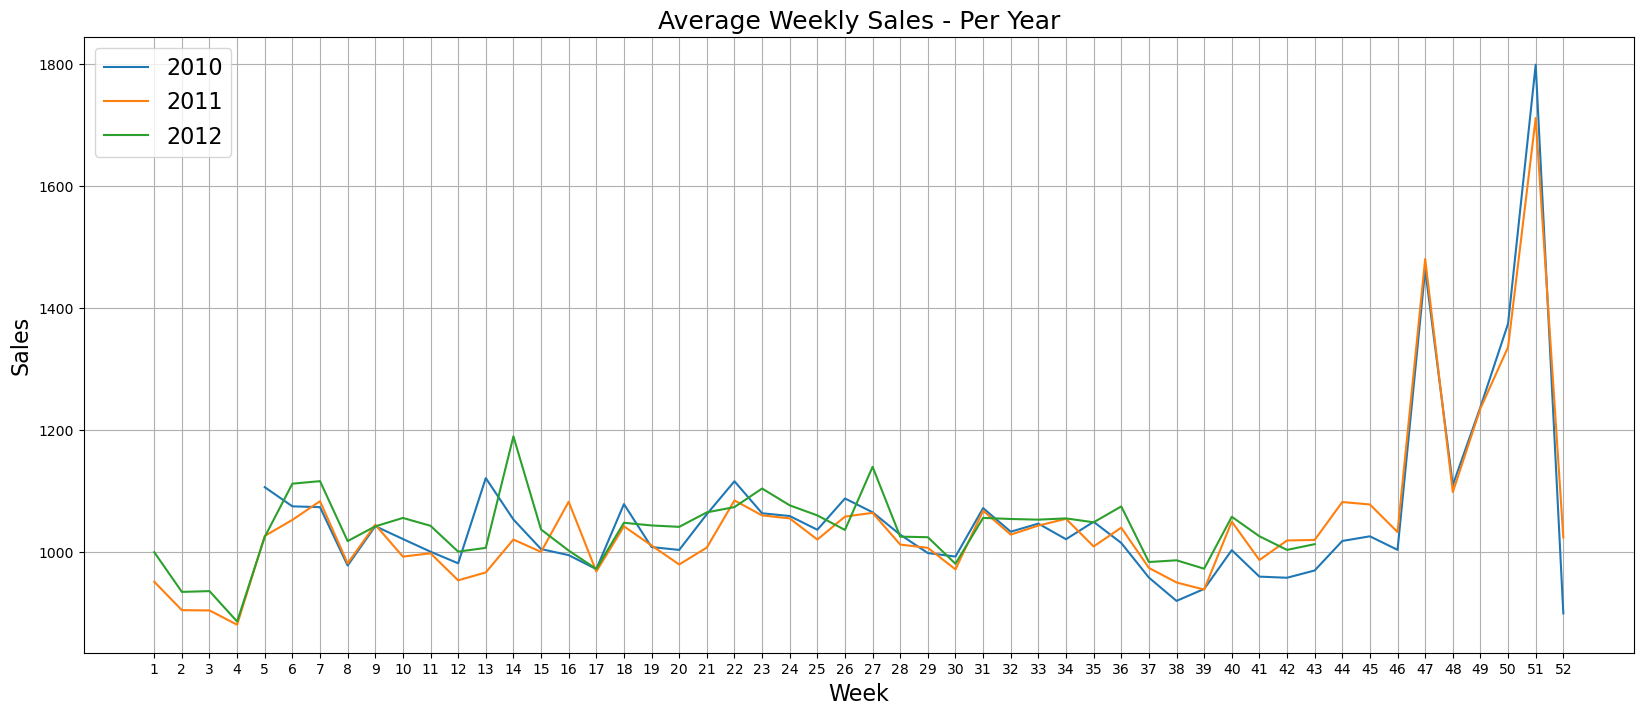

In [27]:
weekly_sales_2010 = data[data.Year==2010]['Weekly_Sales'].groupby(data['Week']).mean()
weekly_sales_2011 = data[data.Year==2011]['Weekly_Sales'].groupby(data['Week']).mean()
weekly_sales_2012 = data[data.Year==2012]['Weekly_Sales'].groupby(data['Week']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()


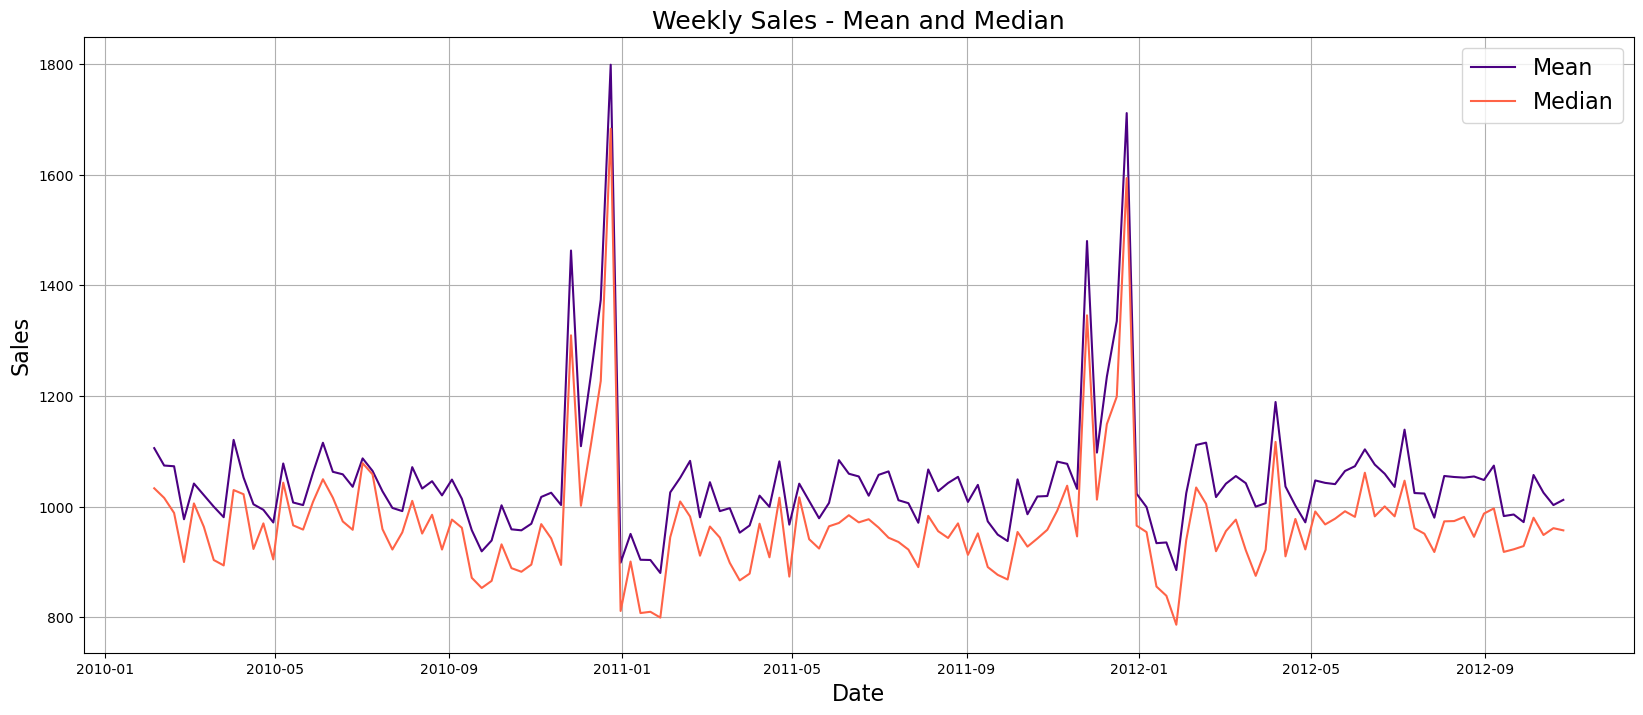

In [28]:
weekly_sales_mean = data['Weekly_Sales'].groupby(data['Date']).mean()
weekly_sales_median = data['Weekly_Sales'].groupby(data['Date']).median()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_mean.index, weekly_sales_mean.values, color = 'indigo')
sns.lineplot(weekly_sales_median.index, weekly_sales_median.values, color = 'tomato')
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

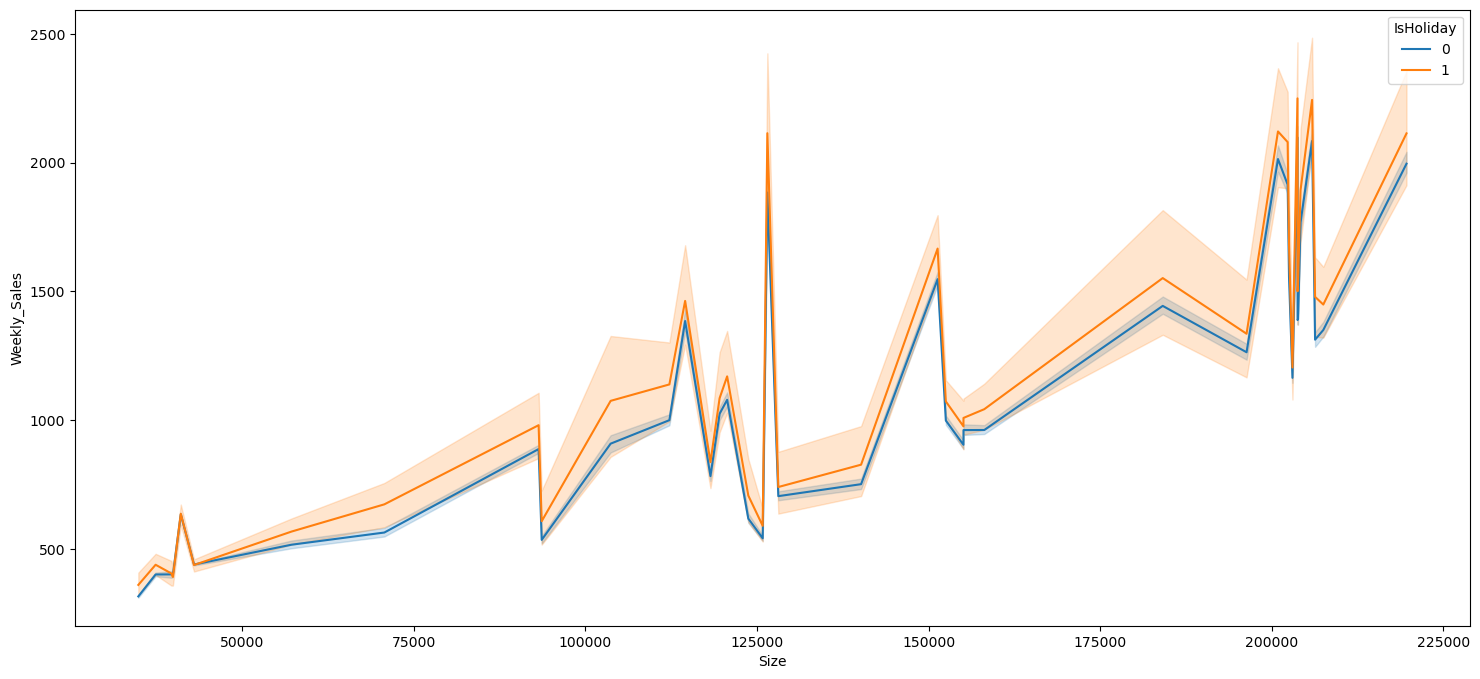

In [29]:
plt.figure(figsize=(18,8))
sns.lineplot ( data = data, x = 'Size', y =  'Weekly_Sales', hue = 'IsHoliday');

In [30]:
px.histogram(data, x='Temperature', y ='Weekly_Sales', color='IsHoliday', marginal='box')

In [31]:
px.histogram(data, x='Fuel_Price', y ='Weekly_Sales', color='IsHoliday', marginal='box')


In [32]:
px.histogram(data, x='CPI', y ='Weekly_Sales', color='IsHoliday')

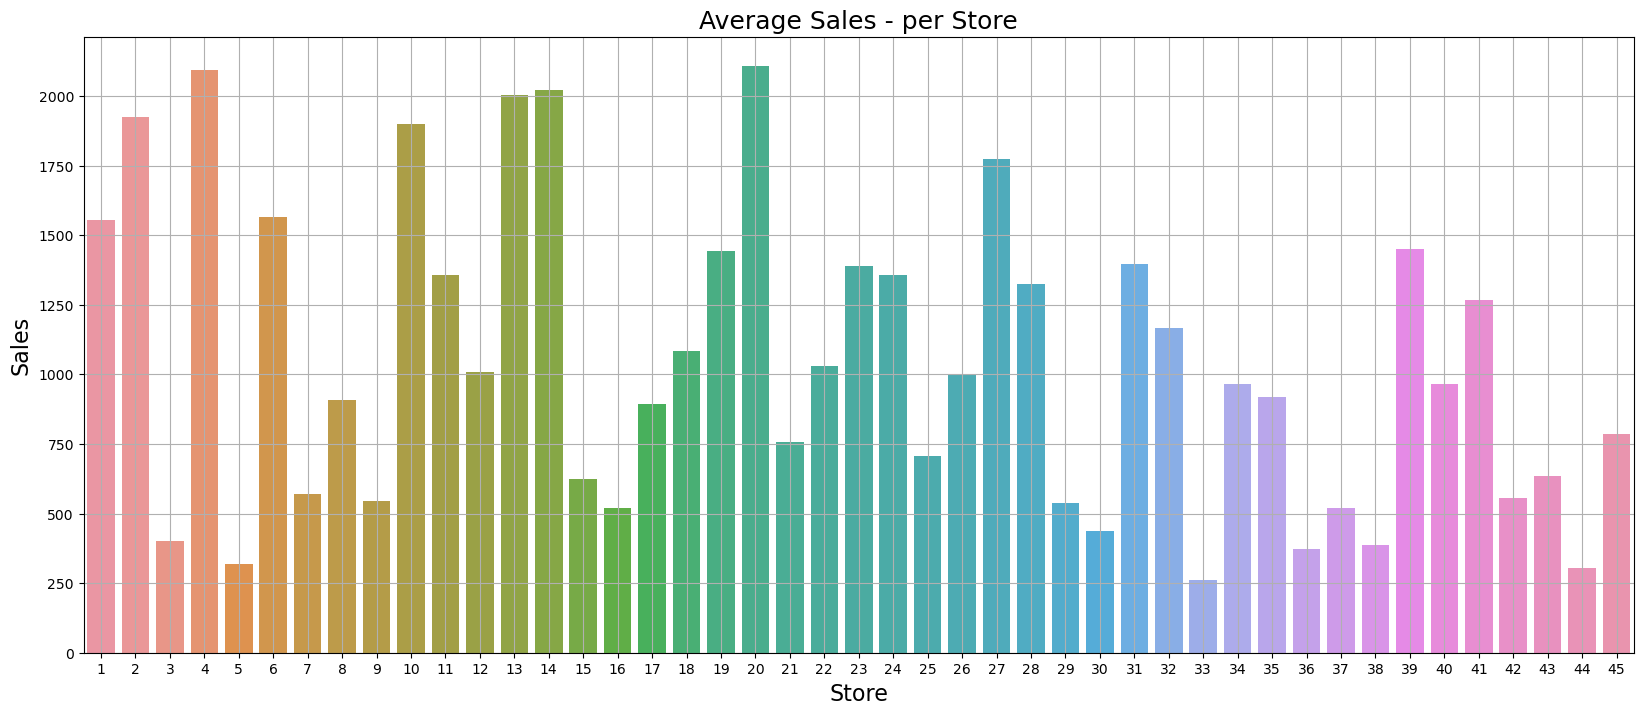

In [33]:
weekly_sales = data['Weekly_Sales'].groupby(data['Store']).mean()
plt.figure(figsize=(20,8))
plt.style.use('default')
sns.barplot(weekly_sales.index, weekly_sales.values)
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

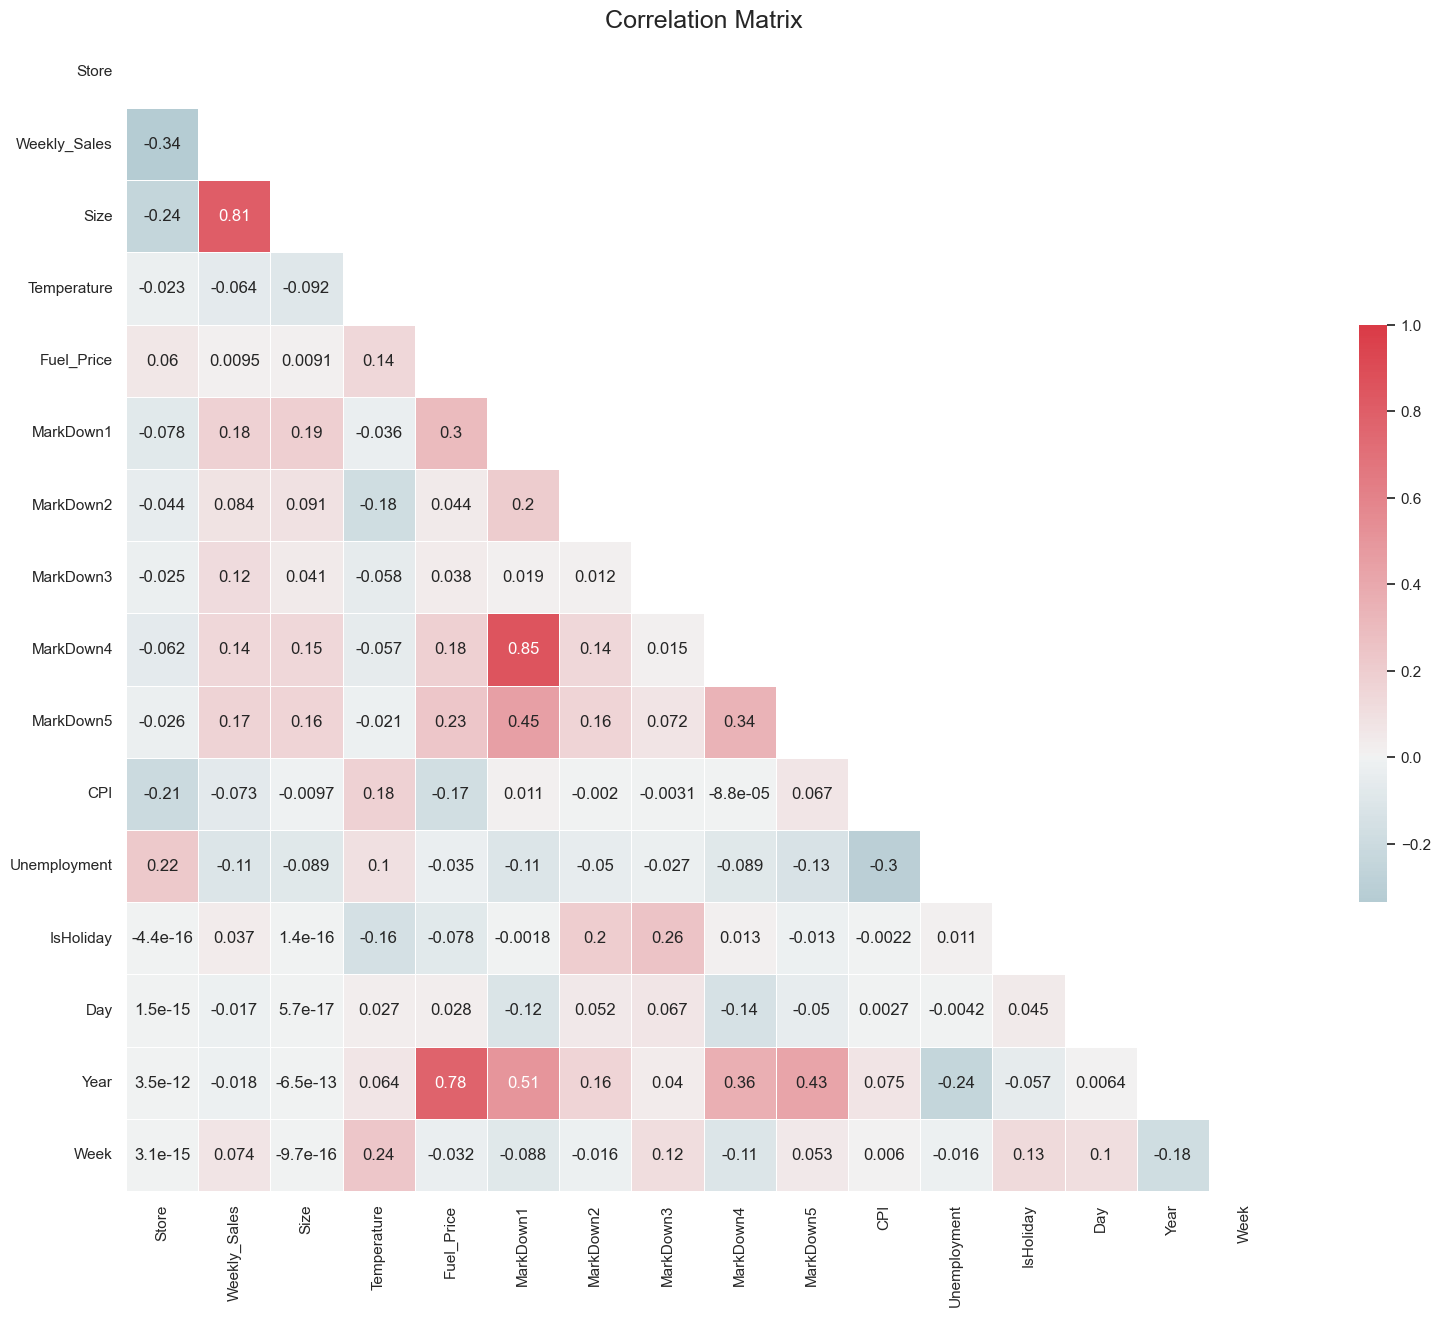

In [34]:
sns.set(style="white")

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [35]:
#store-4

data1 = pd.read_csv('C:\\Users\\rayap\\OneDrive\\Desktop\\SET Project ML\\train.csv')
data1.set_index('Date', inplace=True)

store4 = data1[data1.Store == 4]
# there are about 45 different stores in this dataset.

sales4 = pd.DataFrame(store4.Weekly_Sales.groupby(store4.index).sum())
sales4.dtypes
sales4.head(20)
# Grouped weekly sales by store 4

#remove date from index to change its dtype because it clearly isnt acceptable.
sales4.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales4['Date'] = pd.to_datetime(sales4['Date'])
# resetting date back to the index
sales4.set_index('Date',inplace = True)

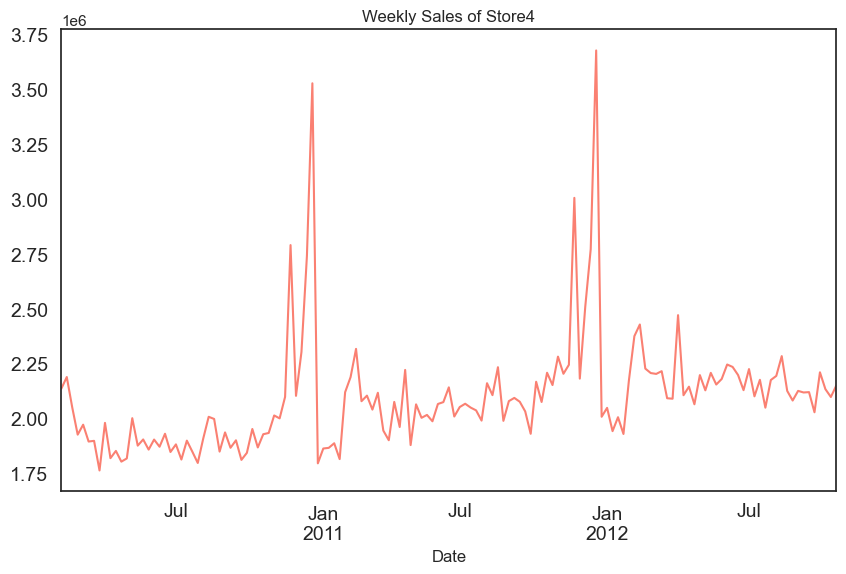

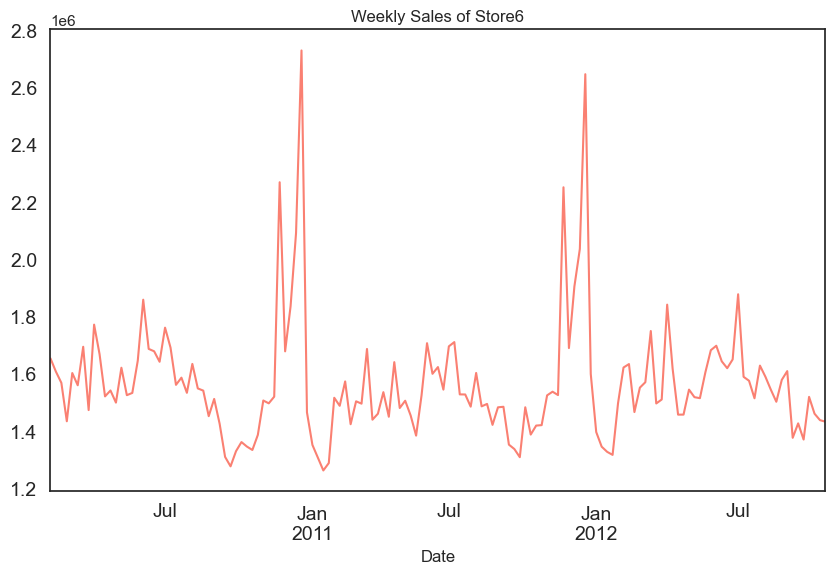

In [36]:
#store-6
# Lets take store 6 data for analysis
store6 = data1[data1.Store == 6]
# there are about 45 different stores in this dataset.

sales6 = pd.DataFrame(store6.Weekly_Sales.groupby(store6.index).sum())
sales6.dtypes
# Grouped weekly sales by store 6

#remove date from index to change its dtype because it clearly isnt acceptable.
sales6.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales6['Date'] = pd.to_datetime(sales6['Date'])
# resetting date back to the index
sales6.set_index('Date',inplace = True)


sales4.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of Store4', fontsize=14, color = 'salmon')
plt.show()
sales6.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of Store6', fontsize=14, color = 'salmon')
plt.show()

<Figure size 640x480 with 0 Axes>

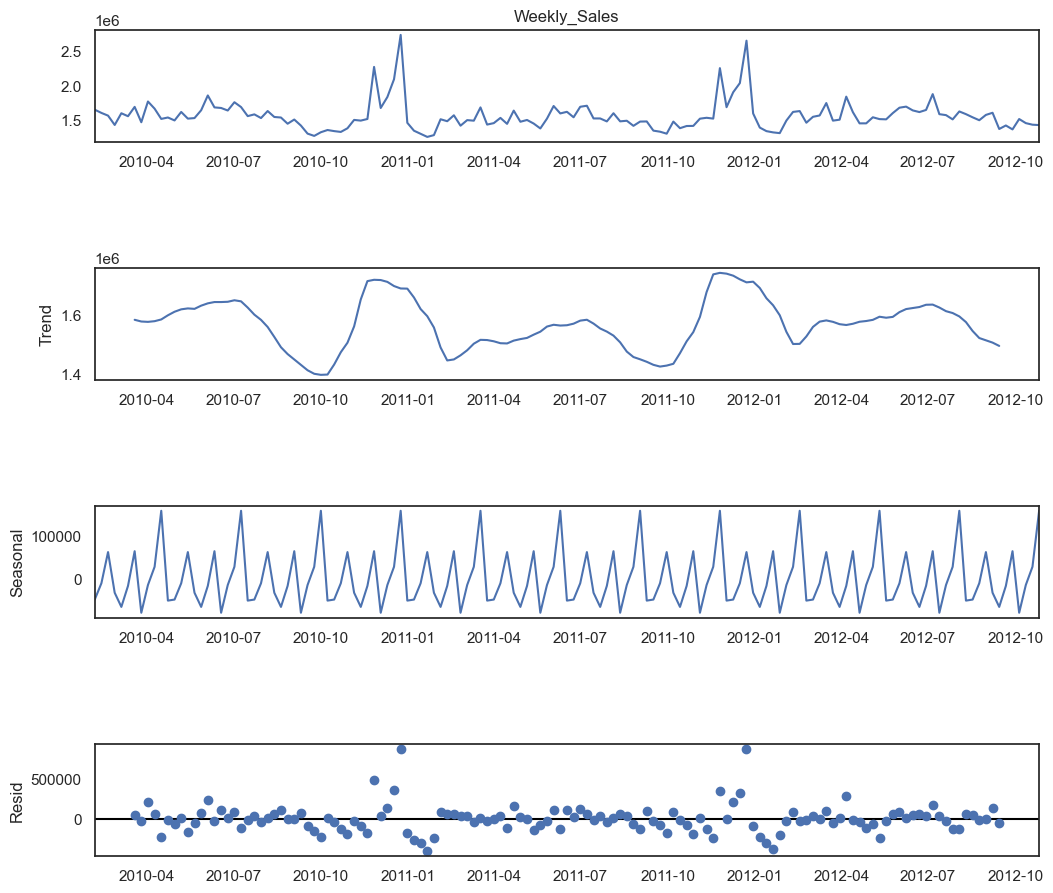

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales6.Weekly_Sales,model='additive', period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

<Figure size 640x480 with 0 Axes>

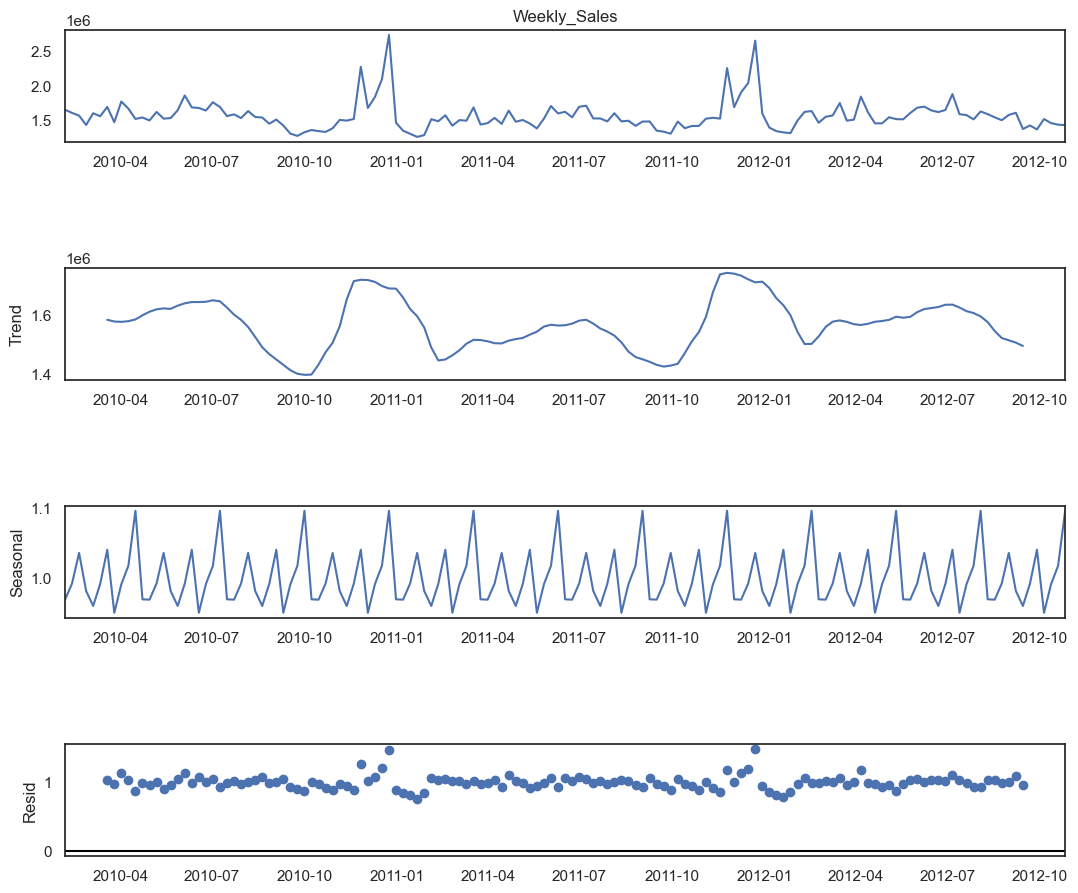

In [38]:
decomposition = seasonal_decompose(sales6.Weekly_Sales, model= 'multiplicative', period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

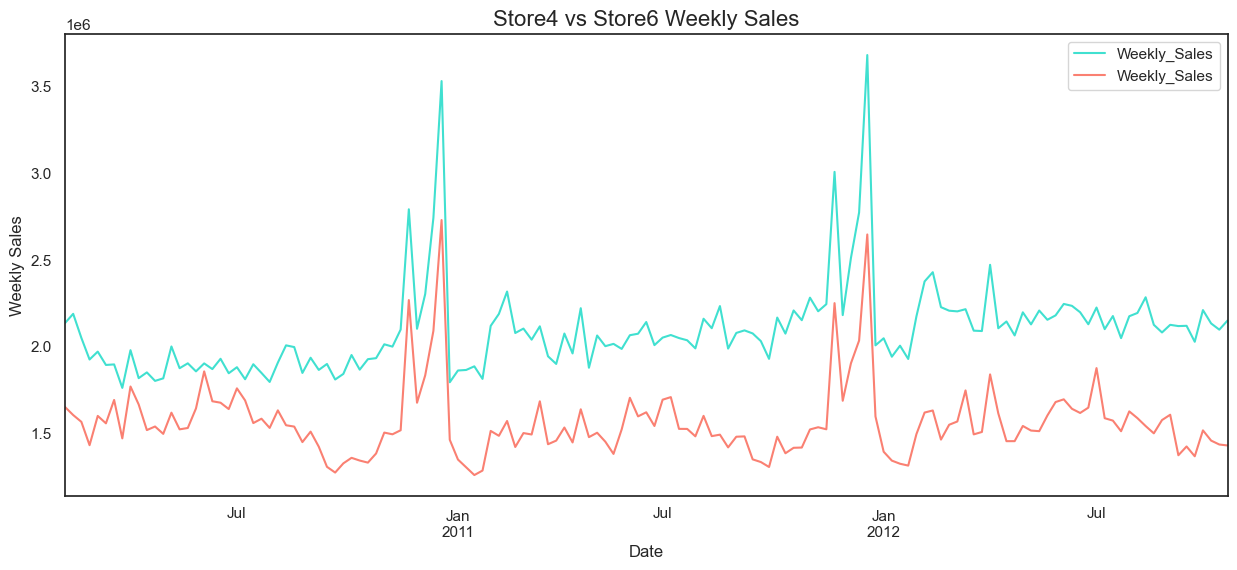

In [39]:
y1=sales4.Weekly_Sales
y2=sales6.Weekly_Sales

y1.plot(figsize=(15, 6), legend=True, color = 'turquoise')
y2.plot(figsize=(15, 6), legend=True, color = 'salmon')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 Weekly Sales', fontsize = '16')
plt.show()

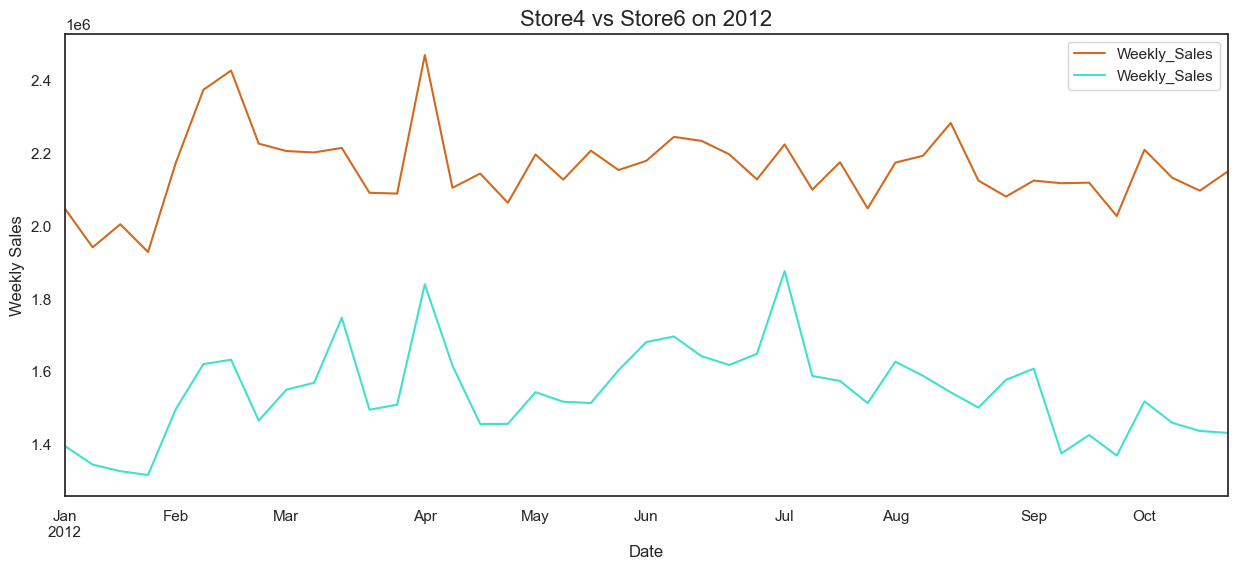

In [40]:
# Lets Look into 2012 data for a better view
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store6 on 2012', fontsize = '16')
plt.show()

In [41]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [42]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,order=(4, 4, 3),seasonal_order=(1, 1, 0, 52),enforce_invertibility=False)

   #enforce_stationarity=False

results = mod.fit()


print(results.summary().tables[1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7577      0.549     -3.199      0.001      -2.835      -0.681
ar.L2         -1.2979      0.592     -2.194      0.028      -2.457      -0.138
ar.L3         -0.5948      0.258     -2.307      0.021      -1.100      -0.089
ar.L4         -0.1867      0.092     -2.034      0.042      -0.367      -0.007
ma.L1         -1.3723      0.501     -2.736      0.006      -2.355      -0.389
ma.L2         -0.2312      1.075     -0.215      0.830      -2.339       1.877
ma.L3          0.6076      0.598      1.016      0.309      -0.564       1.779
ar.S.L52      -0.0670      0.048     -1.381      0.167      -0.162       0.028
sigma2      1.622e+10   6.66e-11   2.43e+20      0.000    1.62e+10    1.62e+10


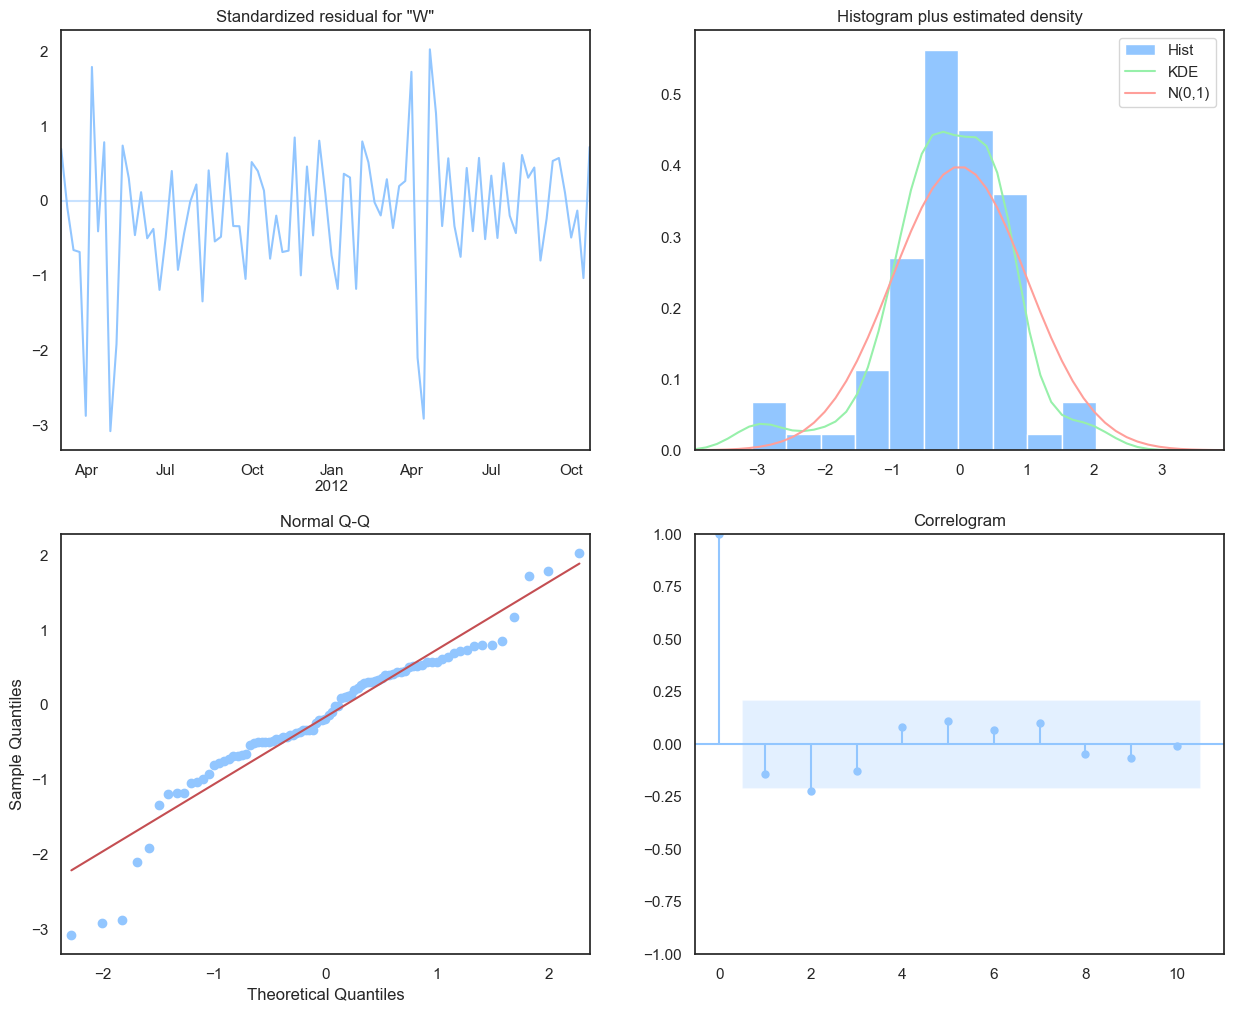

In [43]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [44]:
# Will predict for last 90 days. So setting the date according to that
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

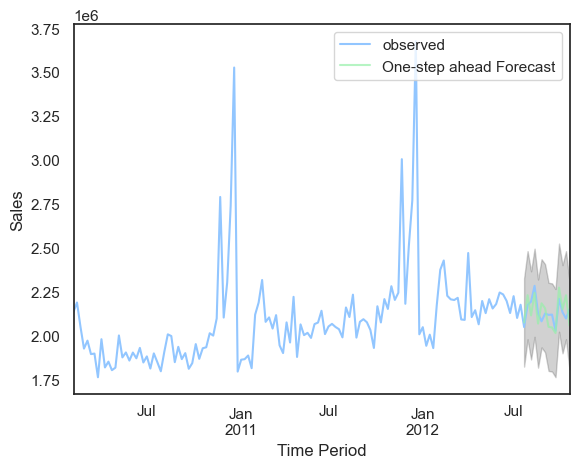

In [45]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [46]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4761711030.45


In [47]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

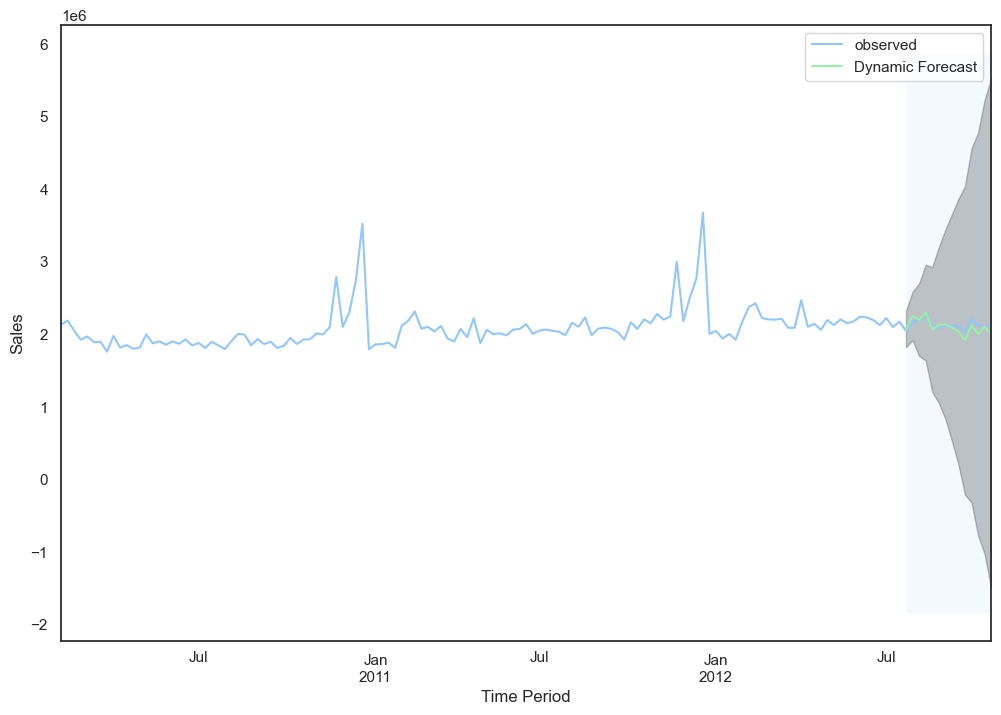

In [48]:
ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [49]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean

y_truth = y1['2012-7-27':]

# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 72299.69


In [50]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())


Residual for Store1 811777.276304381


In [51]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

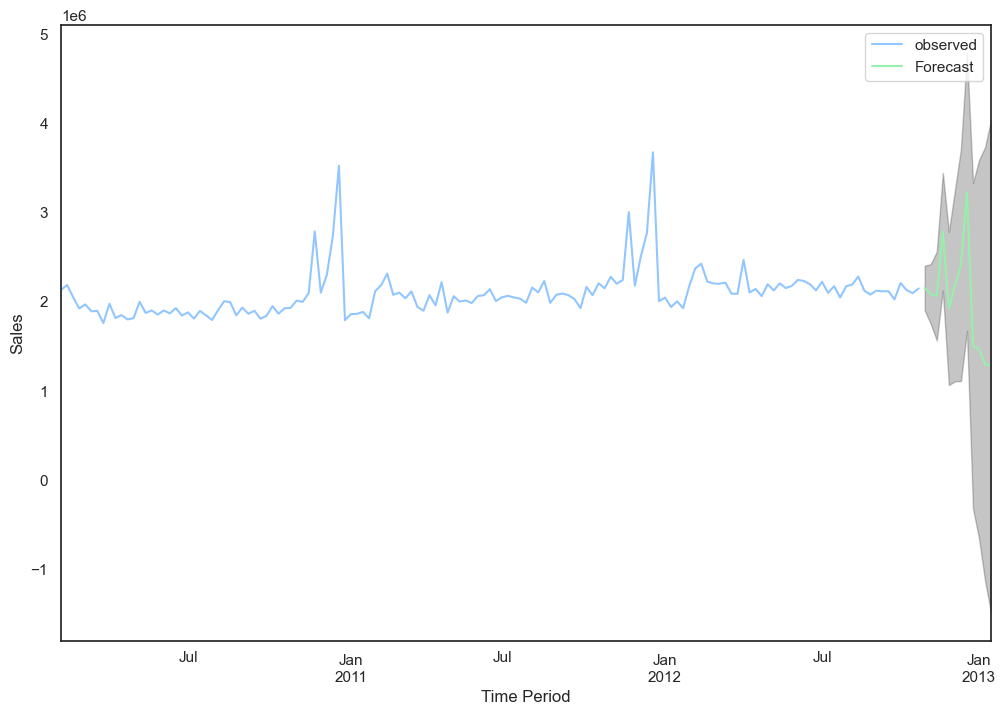

In [52]:
ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [53]:
# create dummy variables for 'Type' and keeping all columns to see heatmap then will drop 1 column
Type_dummies = pd.get_dummies(data.Type, prefix='Type')

# concatenate two DataFrames (axis=0 for rows, axis=1 for columns)
data = pd.concat([data, Type_dummies], axis=1)

# Not dropping the orginal Type column now so that I can use the field in some data analysis 

In [54]:
#Create a dataframe for heatmap
data_heatmap_df=data.copy()

# Eliminating all the columns that are not continuous/binary  variables from the heatmap section.
data_heatmap_df.drop(['Store','Day','Month','Year','Date','Store','Type','Type_A','Type_B','Type_C'], axis=1,inplace=True)


# Lets look the correlation matrix and heat map of the 

## Correlation Heat map
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,8))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap='Pastel1_r')

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

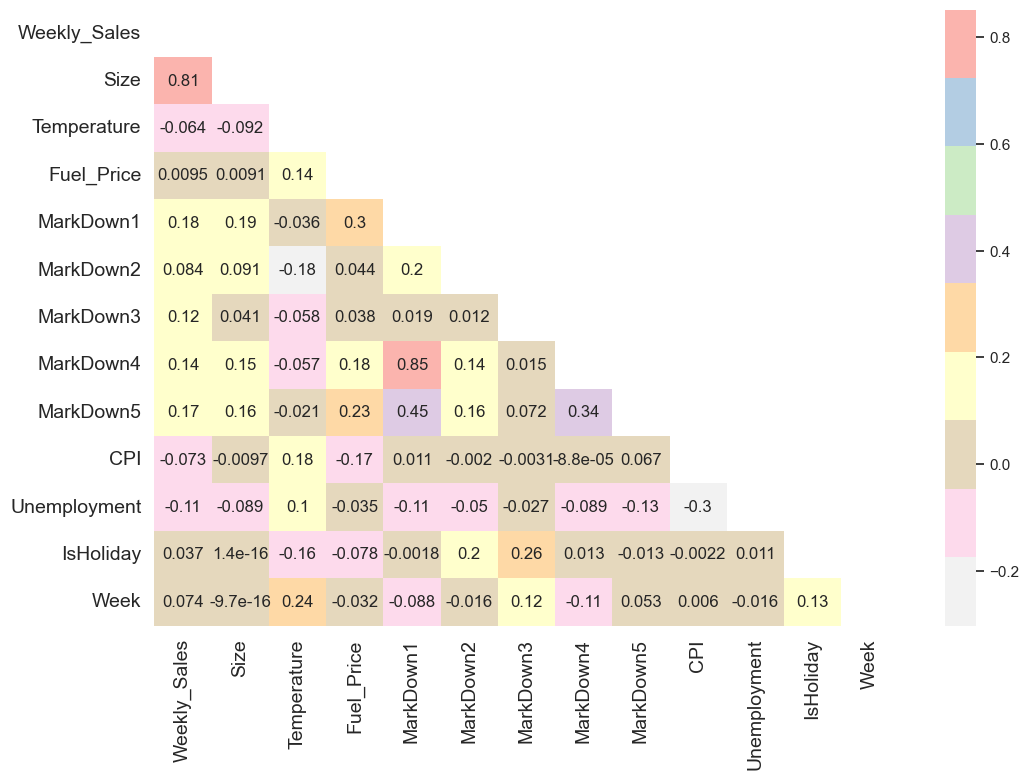

In [55]:
correlation_heat_map(data_heatmap_df)

#inference: By checking the direct correlation of features there is no much promising correlations. 
#           There are no much correlation within the features as well. In a way this is good because 
#           there won't be multicollinearity that we have to take care while running models.

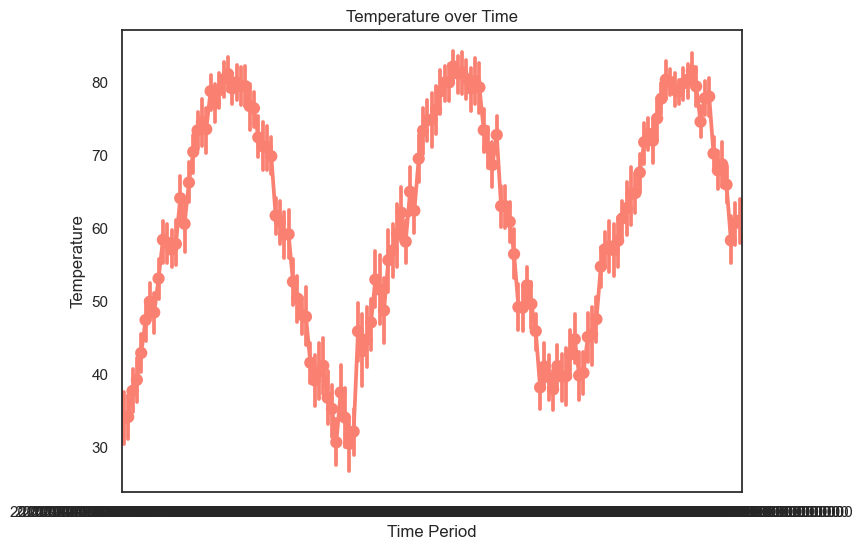

In [56]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Temperature", data=data, color = 'salmon')
plt.xlabel('Time Period')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.show()
# inference: Graph clearly shows Temperature is more of a seasonal and repeated in cycles and this would 
# be an interesting data point that we can use for studies further

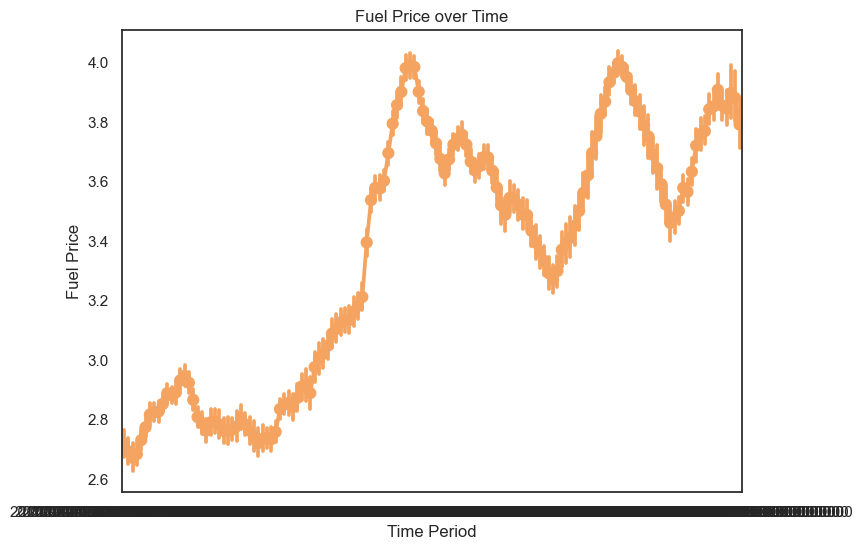

In [57]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Fuel_Price", data=data, color = 'sandybrown')
plt.xlabel('Time Period')
plt.ylabel('Fuel Price')
plt.title('Fuel Price over Time')
plt.show()
# inference: Fuel price varies over time and there are high and lows


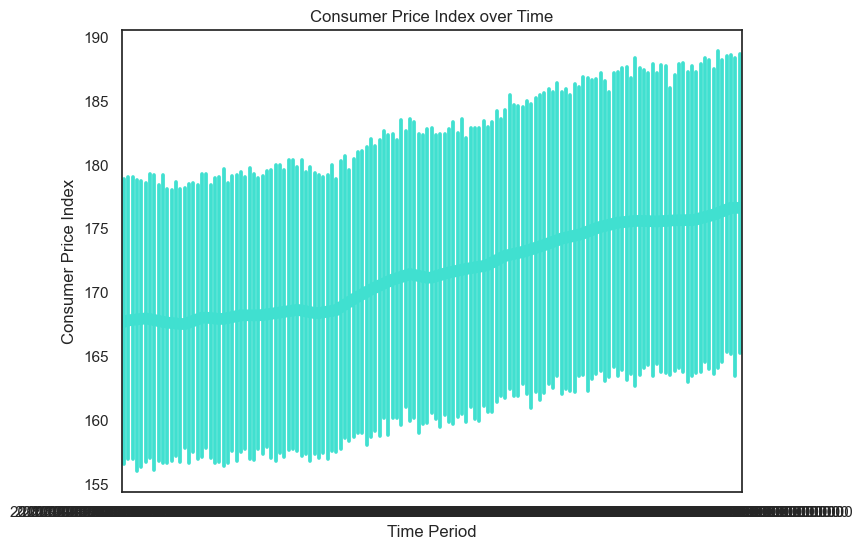

In [58]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="CPI", data=data, color = 'turquoise')
plt.xlabel('Time Period')
plt.ylabel('Consumer Price Index')
plt.title('Consumer Price Index over Time')
plt.show()
# inference: over time CPI have increased. but the change is not much

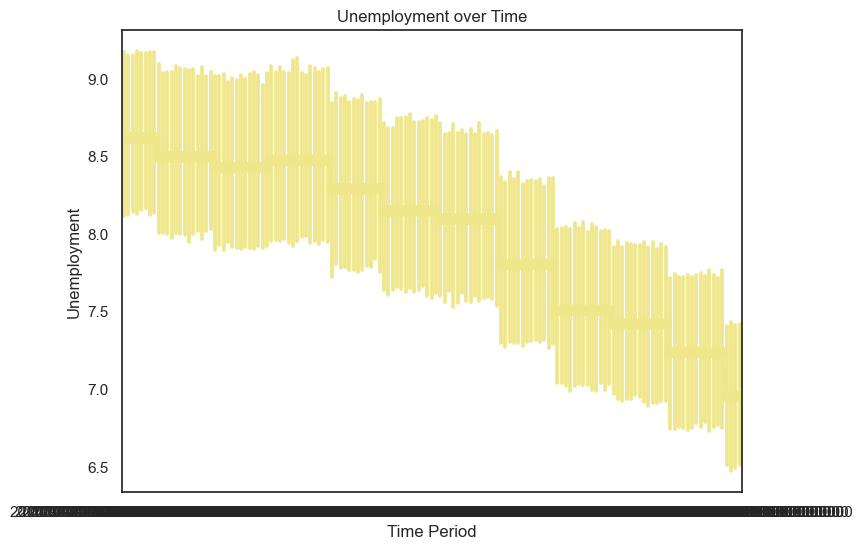

In [59]:
plt.figure(figsize=(8,6))
sns.pointplot(x="Date", y="Unemployment", data=data, color='khaki')
plt.xlabel('Time Period')
plt.ylabel('Unemployment')
plt.title('Unemployment over Time')
plt.show()
# inference:  Over time unemployment have came down we can see this factor also whether it have affected the Sales


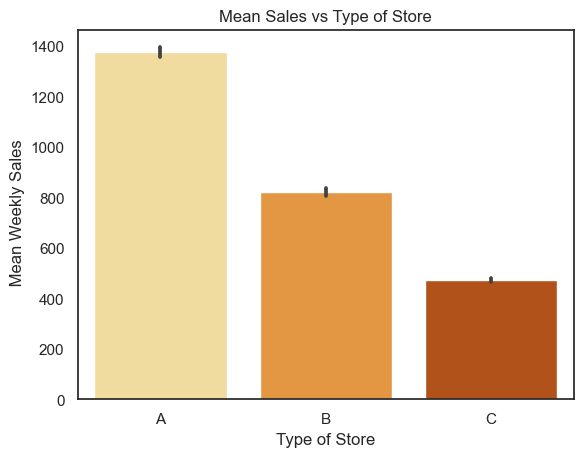

In [60]:
# Checking how the Type of the store have effect on the sales.
col=['coral', 'greenyellow', 'turquoise']
sns.barplot(x="Type", y="Weekly_Sales", data=data,orient='v', palette ='YlOrBr')
plt.xlabel('Type of Store')
plt.ylabel(' Mean Weekly Sales')
plt.title('Mean Sales vs Type of Store')
#plt.savefig('./images/Type_vs_Sales.png')
plt.show()

# inference: From the graph its clear that Type A > Type B > Type C in mean weekly sales.

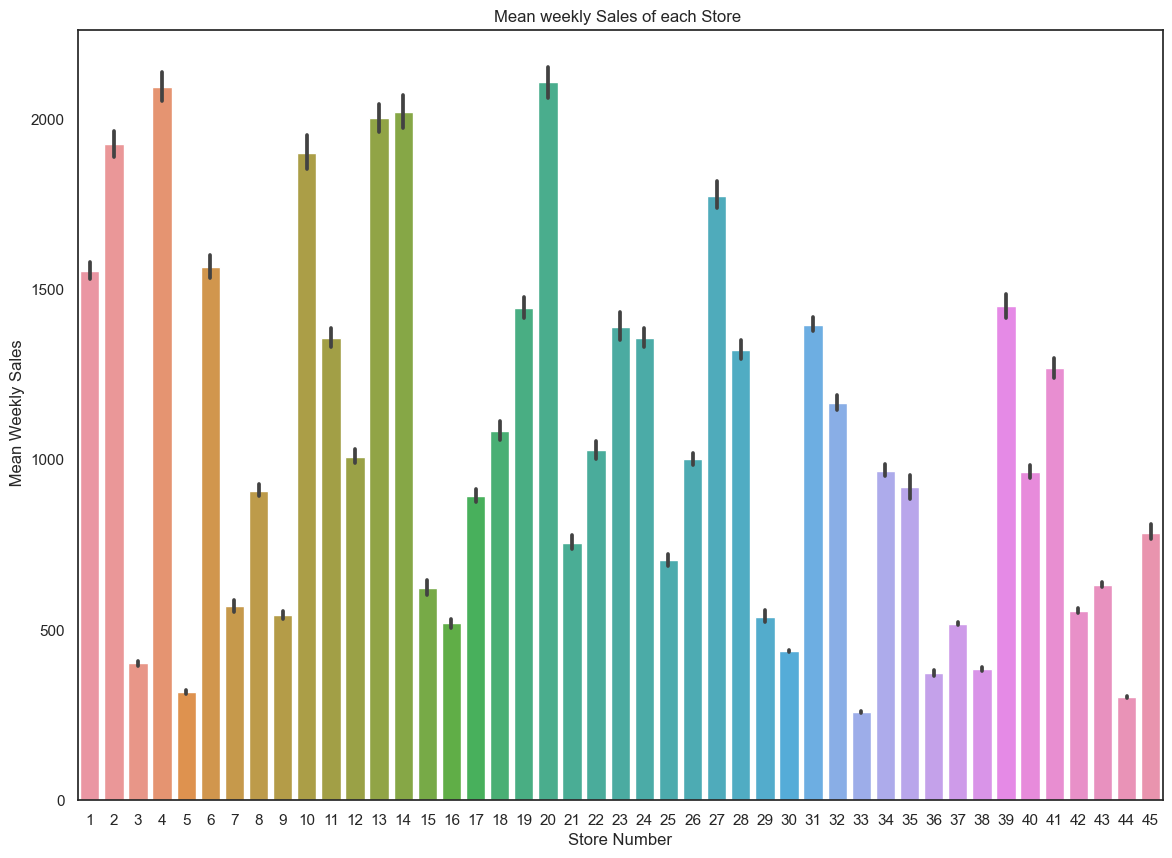

In [61]:
plt.subplots(figsize=(14,10))
sns.barplot(x="Store", y="Weekly_Sales", data=data,orient='v')
plt.xlabel('Store Number')
plt.ylabel(' Mean Weekly Sales')
plt.title('Mean weekly Sales of each Store ')
#plt.savefig('./images/Mean_Weekly_Sales_vs_Stores.png')
plt.show()

# inference : From the chart we can see that there are stores that have a weekly sales from $250,000  
#             to $2,200,000

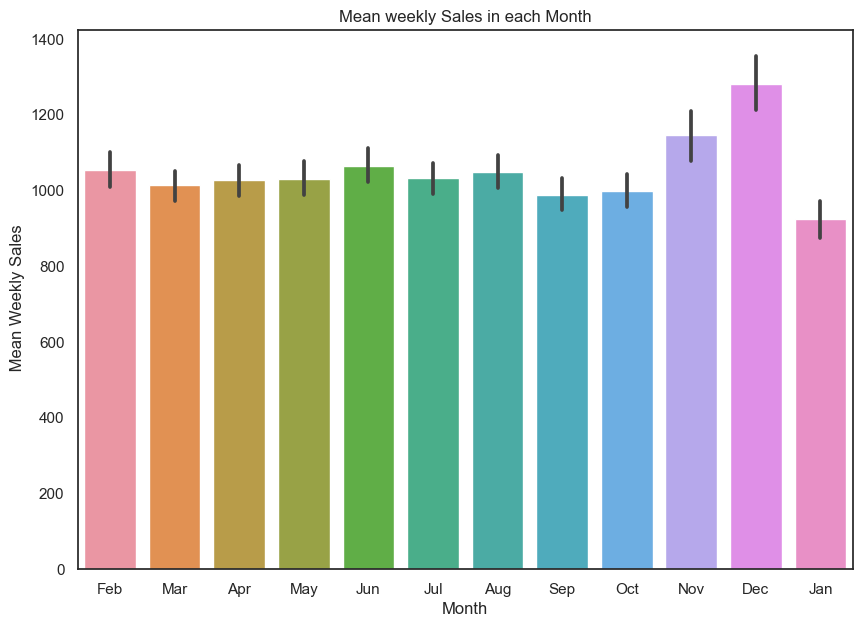

In [62]:
plt.subplots(figsize=(10,7))
sns.barplot(x="Month", y="Weekly_Sales", data=data,orient='v')
plt.xlabel('Month')
plt.ylabel(' Mean Weekly Sales')
plt.title('Mean weekly Sales in each Month')
#plt.savefig('./images/Mean_Weekly_Sales_vs_Months.png')
plt.show()
# inference: Graph shows sales in each month and from this we can see December seems to have a very high sales 
#            compared to every other month and January have the least sales. 

In [63]:
# Create Week column which says which week of the month it is. 
data["Week"]= round(np.floor(((data.Day-1)/7)+1))

# Create dummies for the columns that are required for later studies
Store_dummies = pd.get_dummies(data.Store, prefix='Store')
Month_dummies = pd.get_dummies(data.Month, prefix='Month')
Year_dummies = pd.get_dummies(data.Year, prefix='Year')
Week_dummies = pd.get_dummies(data.Week, prefix='Week')

# concatenate DataFrames (axis=0 for rows, axis=1 for columns)
data = pd.concat([data, Store_dummies,Month_dummies,Year_dummies,Week_dummies], axis=1)

In [64]:
data_decision=data.iloc[:,:18]

data_decision["Week"]= round(np.floor(((data_decision.Day-1)/7)+1))

In [65]:
# Drop the columns that we have created dummies
data.drop(['Type', 'Store','Month','Year','Day','Week'], axis=1, inplace=True) 

In [66]:
# drop each column from the list of dummies to make it perfect to use in models
data.drop(['Type_C', 'Store_1','Month_Jan','Year_2010','Week_5.0'], axis=1, inplace=True) 

In [67]:
data.iloc[:,5:10].describe().T

# Inference: more than 50% is missing values with (-500) so imputing with KNN might not be a good idea. 
# But what are the other methods? imputing with random values in the range of that particular columns?
# Lets try that first.

count         mean          std    min    25%    50%       75%  \
MarkDown1  6435.0  2106.175500  6008.334618 -500.0 -500.0 -500.0  2302.300   
MarkDown2  6435.0   446.067837  4946.234382 -500.0 -500.0 -500.0     0.090   
MarkDown3  6435.0    88.158396  5306.320800 -500.0 -500.0 -500.0     3.705   
MarkDown4  6435.0   661.551088  3853.055534 -500.0 -500.0 -500.0   314.320   
MarkDown5  6435.0  1260.128491  4227.342723 -500.0 -500.0 -500.0  1983.265   

                 max  
MarkDown1   88646.76  
MarkDown2  104519.54  
MarkDown3  141630.61  
MarkDown4   67474.85  
MarkDown5  108519.28

In [68]:
data.MarkDown1=data.MarkDown1.map(lambda x: np.nan if x==-500 else x)
data.MarkDown2=data.MarkDown2.map(lambda x: np.nan if x==-500 else x)
data.MarkDown3=data.MarkDown3.map(lambda x: np.nan if x==-500 else x)
data.MarkDown4=data.MarkDown4.map(lambda x: np.nan if x==-500 else x)
data.MarkDown5=data.MarkDown5.map(lambda x: np.nan if x==-500 else x)


In [69]:
missing_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']

# Not including our actual y(Weekly Sales) and Size of store for Markdown since by including weekly sales
# It can be a bad method to use those MarkDown again for predicting weekly sales. 

impute_cols = [c for c in data.columns if not c in ['Weekly_Sales','Date','Sqrt_Sales','lnSales']+missing_cols]

data_imputed=data.copy()

In [70]:
def find_best_k_reg(X, y, k_min=1, k_max=51, step=2, cv=10):
    k_range = range(k_min, k_max+1, step)
    r2s = []
    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=cv)
        r2s.append(np.mean(scores))
    print ("Best R2 value:",np.max(r2s),"\nBest k: ",np.argmax(k_range))
    return np.argmax(k_range)

In [71]:
impute_missing = data.loc[data.MarkDown1.isnull(), :]
impute_valid = data.loc[~data.MarkDown1.isnull(), :]

y = impute_valid.MarkDown1.values
X = impute_valid[impute_cols]

Xs = ss.fit_transform(X)

Best R2 value: 0.14140639091506765 
Best k:  25


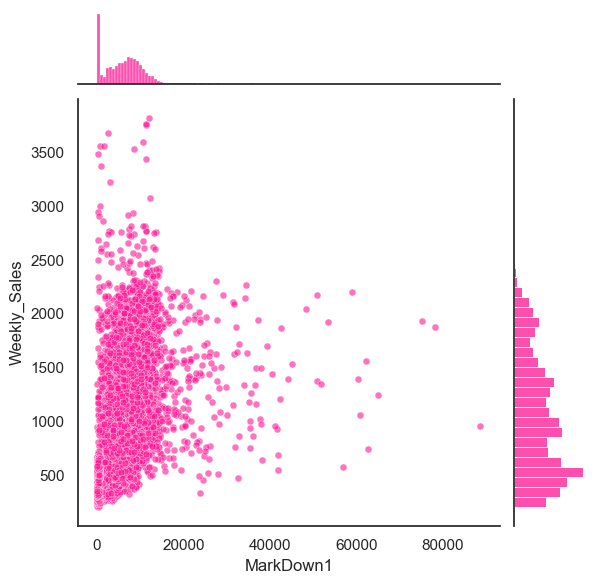

In [72]:
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown1_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown1.isnull(), 'MarkDown1'] = MarkDown1_impute

#Lets look how the MarkDown1 vs Weekly_Sales appear
sns.jointplot(data_imputed.MarkDown1, data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color='deeppink')
plt.show()

Best R2 value: 0.41503402148479146 
Best k:  25


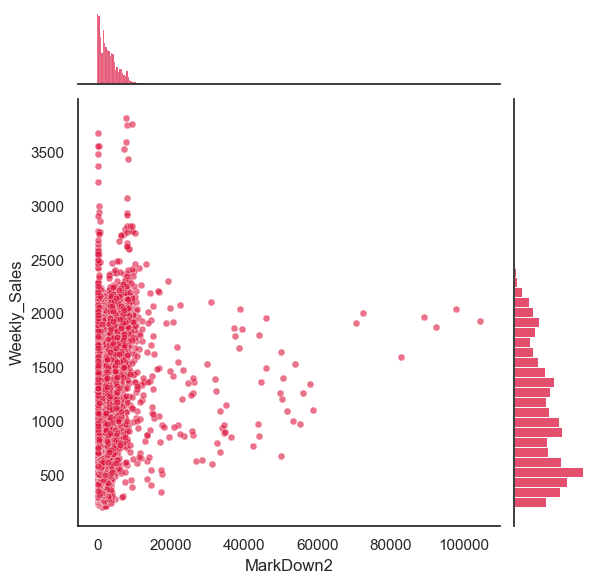

In [73]:
impute_missing = data.loc[data.MarkDown2.isnull(), :]
impute_valid = data.loc[~data.MarkDown2.isnull(), :]

y = impute_valid.MarkDown2.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown2_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown2.isnull(), 'MarkDown2'] = MarkDown2_impute

#Lets look how the MarkDown1 vs Weekly_Sales appear
sns.jointplot(data_imputed.MarkDown2, data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color = 'crimson')
plt.show()

Best R2 value: 0.20431863554303203 
Best k:  25


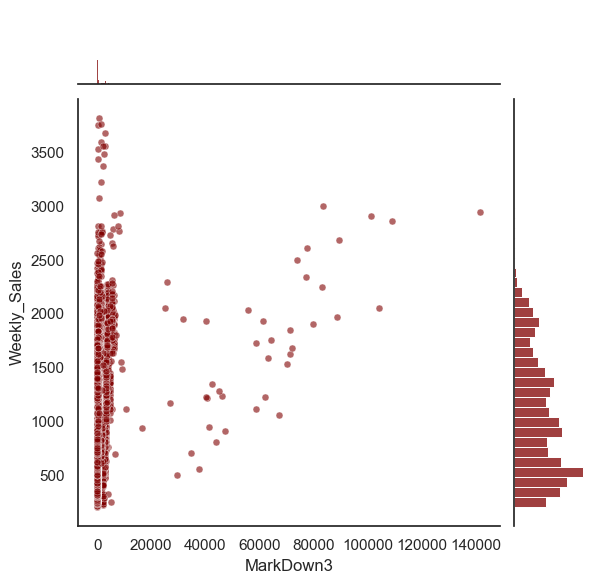

In [74]:
impute_missing = data.loc[data.MarkDown3.isnull(), :]
impute_valid = data.loc[~data.MarkDown3.isnull(), :]

y = impute_valid.MarkDown3.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown3_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown3.isnull(), 'MarkDown3'] = MarkDown3_impute

sns.jointplot(data_imputed.MarkDown3, data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color= 'maroon')
plt.show()

Best R2 value: 0.3470822603116795 
Best k:  25


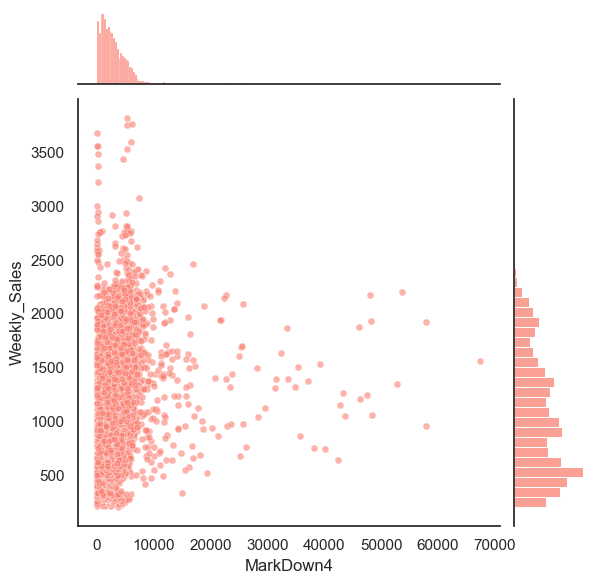

In [75]:
impute_missing = data.loc[data.MarkDown4.isnull(), :]
impute_valid = data.loc[~data.MarkDown4.isnull(), :]

y = impute_valid.MarkDown4.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown4_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown4.isnull(), 'MarkDown4'] = MarkDown4_impute

sns.jointplot(data_imputed.MarkDown4, data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color = 'salmon')
plt.show()

Best R2 value: 0.0815206539204145 
Best k:  25


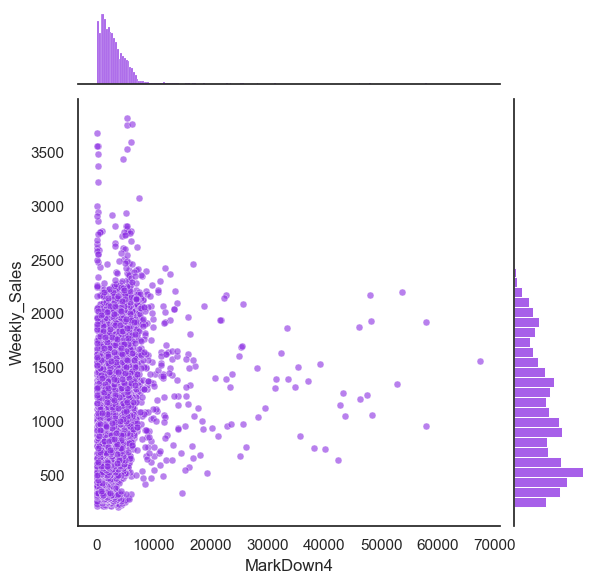

In [76]:
impute_missing = data.loc[data.MarkDown5.isnull(), :]
impute_valid = data.loc[~data.MarkDown5.isnull(), :]

y = impute_valid.MarkDown5.values
X = impute_valid[impute_cols]

ss = StandardScaler()
Xs = ss.fit_transform(X)
best_k = find_best_k_reg(Xs, y)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(Xs, y)

X_miss = impute_missing[impute_cols]
X_miss_s = ss.transform(X_miss)

MarkDown5_impute = knn.predict(X_miss_s)

data_imputed.loc[data.MarkDown5.isnull(), 'MarkDown5'] = MarkDown5_impute

sns.jointplot(data_imputed.MarkDown4, data_imputed.Weekly_Sales, joint_kws=dict(s=25, alpha=0.6), color = 'blueviolet')
plt.show()

In [77]:
walmart_data=data_imputed.copy()

# The accuracy and R2 are very bad. This means that we likely imputing crap with these models.
# This doesn't necessarily mean that imputation is a bad idea, but we may want to consider
# using a different method.

0.9425753525477244
0.9449124636506752
Adjusted R^2 0.9419072041339716
Cross-validated scores: [0.94833919 0.95130079 0.93608557 0.94909925 0.93523783 0.94060127
 0.95554148 0.93146128 0.94127396 0.93860015]
Mean Cross validation 0.9427540752999709


Text(0.5, 1.0, 'Predicted vs Actual Sales')

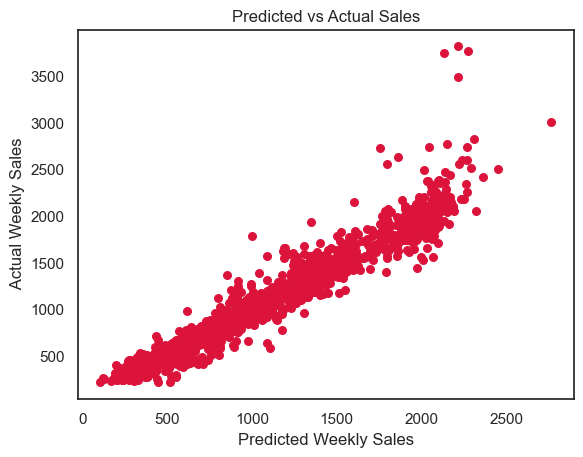

In [78]:
predictors=[col for col in data_imputed.columns if col not in ['Date','Weekly_Sales']]
X=data_imputed[predictors]
y=data_imputed.Weekly_Sales.values 

Xs = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
r2=mlr.score(X_test, y_test)

print(mlr.score(X_test, y_test))
print(mlr.score(X_train, y_train))

adj_r2 = 1 - (len(y)-1)/(len(y)-X.shape[1]-1)*(1-r2)
print("Adjusted R^2",adj_r2)


# Perform 10-fold cross validation
scores = cross_val_score(mlr, X_train, y_train, cv=10)
print ("Cross-validated scores:", scores)
print ("Mean Cross validation",scores.mean())



# Make cross validated predictions on the test sets
predictions = cross_val_predict(mlr, X_test, y_test, cv=10)

plt.scatter(predictions, y_test, s=30, c='crimson', zorder=10)
plt.xlabel('Predicted Weekly Sales')
plt.ylabel(' Actual Weekly Sales')
plt.title('Predicted vs Actual Sales')


In [79]:
Xs

array([[ 0.33317532, -0.99513556, -1.71379998, ..., -0.54772256,
        -0.54772256, -0.54772256],
       [ 0.33317532, -1.20117022, -1.76608938, ...,  1.82574186,
        -0.54772256, -0.54772256],
       [ 0.33317532, -1.12417832, -1.84016603, ..., -0.54772256,
         1.82574186, -0.54772256],
       ...,
       [-0.19119308, -0.33582468,  1.39741931, ...,  1.82574186,
        -0.54772256, -0.54772256],
       [-0.19119308, -0.22738539,  1.32987884, ..., -0.54772256,
         1.82574186, -0.54772256],
       [-0.19119308, -0.09834264,  1.14032976, ..., -0.54772256,
        -0.54772256,  1.82574186]])

0.9429223159775696
0.939548001956522
Cross-validated scores: [ 7.00623668e-01 -5.39580983e+13 -1.51877409e+14 -2.33657933e+13
 -2.53039477e+13 -2.67350619e+13 -3.32196451e+13 -1.29924968e+13
 -7.80176580e+12 -1.71692765e+13]
Mean Cross validation -35242349389676.49


Text(0.5, 1.0, 'Predicted vs Actual Sales')

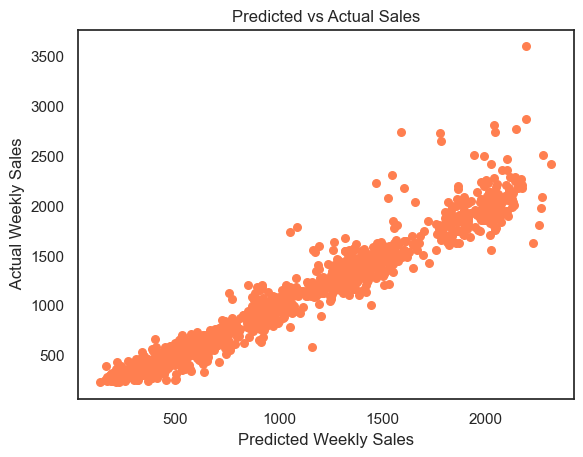

In [80]:
predictors=[col for col in data.columns if col not in ['Date','Weekly_Sales']]
predictors=[col for col in predictors if 'MarkDown' not in col]
X=data[predictors]
y=data.Weekly_Sales.values 
Xs = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))


# Perform 10-fold cross validation
scores = cross_val_score(lr, X, y, cv=10)
print ("Cross-validated scores:", scores)
print ("Mean Cross validation",scores.mean())



# Make cross validated predictions on the test sets
predictions = cross_val_predict(lr, X_test, y_test, cv=10)

plt.scatter(predictions, y_test, s=30, color = 'coral', zorder=10)
plt.xlabel('Predicted Weekly Sales')
plt.ylabel(' Actual Weekly Sales')
plt.title('Predicted vs Actual Sales')


In [81]:
data=data_imputed.copy()
data

Date  Weekly_Sales    Size  Temperature  Fuel_Price   MarkDown1  \
0    2010-02-05    1643.69090  151315        42.31       2.572  11093.5024   
1    2010-02-12    1641.95744  151315        38.51       2.548   9175.0396   
2    2010-02-19    1611.96817  151315        39.93       2.514   7064.4916   
3    2010-02-26    1409.72759  151315        46.63       2.561   7525.9280   
4    2010-03-05    1554.80668  151315        46.50       2.625   9749.6264   
...         ...           ...     ...          ...         ...         ...   
6430 2012-09-28     713.17395  118221        64.88       3.997   4556.6100   
6431 2012-10-05     733.45507  118221        64.89       3.985   5046.7400   
6432 2012-10-12     734.46436  118221        54.47       4.000   1956.2800   
6433 2012-10-19     718.12553  118221        56.47       3.969   2004.0200   
6434 2012-10-26     760.28143  118221        58.85       3.882   4018.9100   

      MarkDown2  MarkDown3   MarkDown4  MarkDown5  ...  Month_May  Month_Nov  \
0     5086.0092   191.8768  11265.2364  5787.1100  ...          0          0   
1     6319.9408  2413.9308   7885.5248  6570.4340  ...          0          0   
2     5578.6700   147.6212   3686.7364  5574.9940  ...          0          0   
3     4976.8168   172.9892   4429.7088  5566.9504  ...          0          0   
4     4433.8064   169.8220   5213.9284  5286.0824  ...          0          0   
...         ...        ...         ...        ...  ...        ...        ...   
6430    20.6400     1.5000   1601.0100  3288.2500  ...          0          0   
6431  2984.0352    18.8200   2253.4300  2340.0100  ...          0          0   
6432  3460.1736     7.8900    599.3200  3990.5400  ...          0          0   
6433  3080.3176     3.1800    437.7300  1537.4900  ...          0          0   
6434    58.0800   100.0000    211.9400   858.3300  ...          0          0   

      Month_Oct  Month_Sep  Year_2011  Year_2012  Week_1.0  Week_2.0  \
0             0          0          0          0         1         0   
1             0          0          0          0         0         1   
2             0          0          0          0         0         0   
3             0          0          0          0         0         0   
4             0          0          0          0         1         0   
...         ...        ...        ...        ...       ...       ...   
6430          0          1          0          1         0         0   
6431          1          0          0          1         1         0   
6432          1          0          0          1         0         1   
6433          1          0          0          1         0         0   
6434          1          0          0          1         0         0   

      Week_3.0  Week_4.0  
0            0         0  
1            0         0  
2            1         0  
3            0         1  
4            0         0  
...        ...       ...  
6430         0         1  
6431         0         0  
6432         0         0  
6433         1         0  
6434         0         1  

[6435 rows x 76 columns]

In [82]:
# Setting the offset to finalize the test data.
offset = timedelta(days=90)
split_date=data.Date.max()-offset

In [83]:
data_train=data[data.Date < split_date]
data_test=data[data.Date > split_date]

In [84]:
data_train = data_train.reindex(np.random.permutation(data_imputed.index))## Identify outliers

In [85]:
data_train.columns

Index(['Date', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type_A', 'Type_B', 'Store_2', 'Store_3',
       'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9',
       'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15',
       'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21',
       'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27',
       'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33',
       'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39',
       'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45',
       'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'Year_2011', 'Year_2012', 'Week_1.0', 'Week_2.0',
       'Week_3

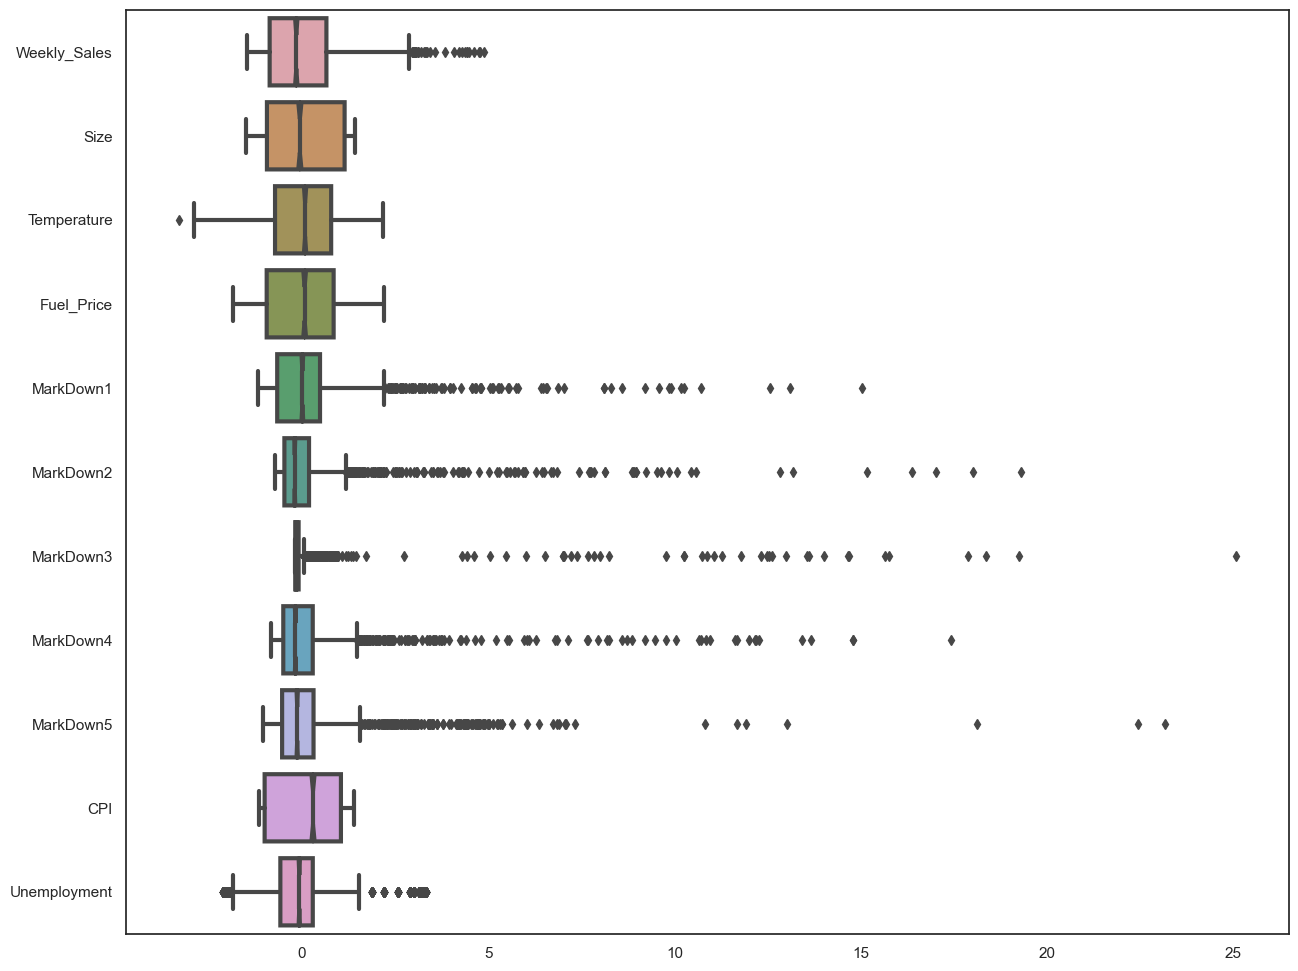

In [86]:
data_box=data_train.iloc[:, 1:12]
data_norm = (data_box - data_box.mean()) / data_box.std()

fig = plt.figure(figsize=(15, 12))
ax = fig.gca()

ax = sns.boxplot(data=data_norm, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

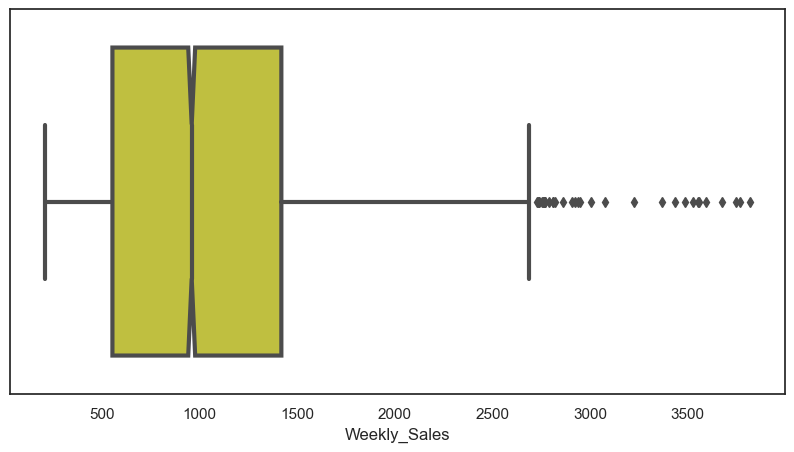

In [87]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()

ax = sns.boxplot(data_train.Weekly_Sales, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax, color = 'yellow')
plt.show()


In [88]:
# Lets consider 3,000,000 as upper limit 
data_train[data_train.Weekly_Sales>3000].shape

(14, 76)

In [89]:
# there is only 14 outliers. Lets drop it and proceed.
data_train=data_train[data_train.Weekly_Sales<3000]

In [90]:
predictors=[col for col in data.columns if col not in ['Weekly_Sales','Sqrt_Sales','lnSales','Date']] # Date

predictors=[col for col in predictors if 'Month' not in col]
predictors=[col for col in predictors if 'Week' not in col]
predictors=[col for col in predictors if 'Year' not in col]

In [91]:
X_train = data_train[predictors]
y_train = data_train.Weekly_Sales.values

X_test = data_test[predictors]
y_test = data_test.Weekly_Sales.values

In [92]:
X_train_s=ss.fit_transform(X_train)
X_test_s=ss.fit_transform(X_test)

In [93]:
lgbm_features = lgb.LGBMRegressor() 

In [94]:
lgbm_features.fit(X_train, y_train)

LGBMRegressor()

In [95]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgbm_features.feature_importances_
}).sort_values('importance', ascending=False)

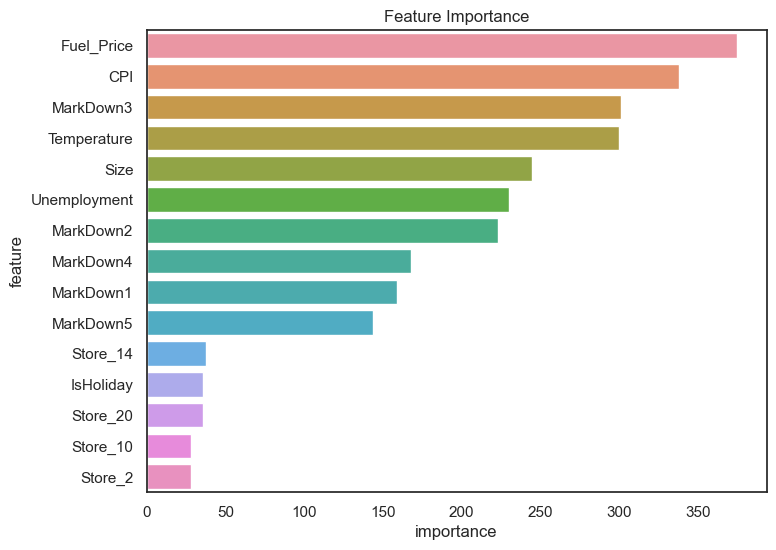

In [96]:
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(15), x='importance', y='feature');

In [97]:
lasso_cv = LassoCV(n_alphas=1000,max_iter=2000, cv=10, verbose=1)
lasso_cv.fit(X_train_s, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(cv=10, max_iter=2000, n_alphas=1000, verbose=1)

In [98]:
# Put the features and coefs into a dataframe
# sort by magnitude
lasso_feat = pd.DataFrame(dict(feature=X_train.columns, coef=lasso_cv.coef_, abscoef=np.abs(lasso_cv.coef_)))
lasso_feat.sort_values('abscoef', inplace=True, ascending=False)
# main_features
lasso_feat[lasso_feat.coef != 0.]

feature        coef     abscoef
0           Size  347.440079  347.440079
11        Type_A  172.384215  172.384215
21      Store_10  131.966692  131.966692
19       Store_8  -98.376268   98.376268
51      Store_40  -92.706010   92.706010
43      Store_32  -89.647948   89.647948
44      Store_33  -85.179793   85.179793
20       Store_9  -77.209609   77.209609
52      Store_41  -77.163473   77.163473
45      Store_34  -75.254886   75.254886
37      Store_26  -74.236073   74.236073
47      Store_36  -74.104517   74.104517
22      Store_11  -69.370005   69.370005
35      Store_24  -59.758579   59.758579
42      Store_31  -58.984018   58.984018
26      Store_15  -53.699262   53.699262
34      Store_23   52.273264   52.273264
36      Store_25  -49.965329   49.965329
32      Store_21  -49.712121   49.712121
30      Store_19  -48.335226   48.335226
9   Unemployment  -46.894832   46.894832
39      Store_28  -46.295713   46.295713
25      Store_14   40.361164   40.361164
31      Store_20   39.469250   39.469250
5      MarkDown3   38.995491   38.995491
50      Store_39  -38.738596   38.738596
55      Store_44  -37.788295   37.788295
17       Store_6  -36.175284   36.175284
16       Store_5  -35.272260   35.272260
40      Store_29  -34.947106   34.947106
23      Store_12   33.918002   33.918002
15       Store_4   32.747364   32.747364
27      Store_16  -24.775158   24.775158
56      Store_45  -23.330999   23.330999
14       Store_3  -21.384872   21.384872
18       Store_7  -20.438032   20.438032
54      Store_43   20.253820   20.253820
29      Store_18   19.693823   19.693823
41      Store_30  -18.265050   18.265050
13       Store_2   16.940394   16.940394
4      MarkDown2  -13.557513   13.557513
24      Store_13   11.418004   11.418004
1    Temperature  -11.400903   11.400903
2     Fuel_Price  -10.287153   10.287153
10     IsHoliday    9.922931    9.922931
33      Store_22    9.539345    9.539345
8            CPI    8.564592    8.564592
46      Store_35    8.259022    8.259022
53      Store_42    7.978034    7.978034
7      MarkDown5    4.842193    4.842193
48      Store_37   -2.774176    2.774176
28      Store_17    1.988387    1.988387
6      MarkDown4   -1.807744    1.807744

In [99]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgbm_features.feature_importances_
}).sort_values('importance', ascending=False)

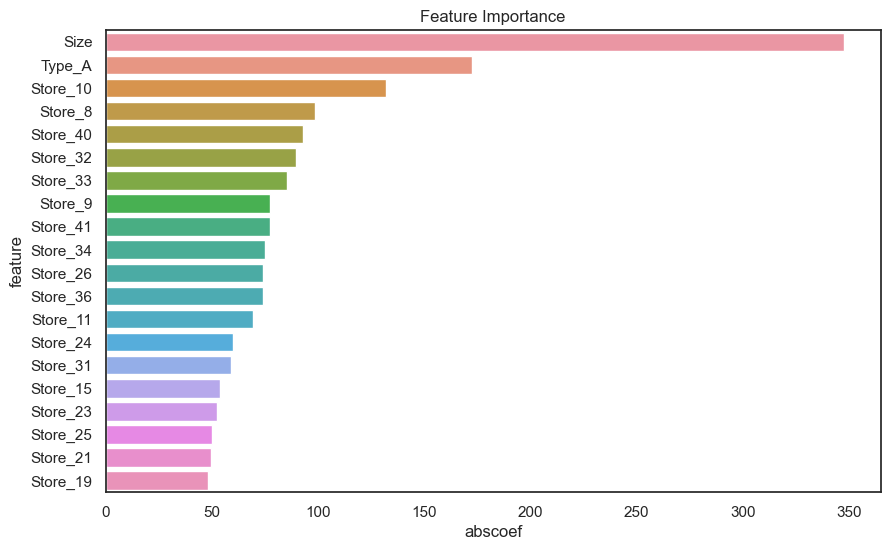

In [100]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=lasso_feat.head(20), x='abscoef', y='feature');

In [101]:
actual_predictors=lasso_feat[lasso_feat.coef != 0.].feature.values

In [102]:
# Lets see the best alpha score
lasso_cv.alpha_

#best alpha value is 0.45384197291954748 which could be used later to run model

0.45384197291954764

In [103]:
# We will assign the best alpha score and according to that we will train and test our model
best_lasso = Lasso(alpha=lasso_cv.alpha_)
best_lasso.fit(X_train_s, y_train)

Lasso(alpha=0.45384197291954764)

In [104]:
lasso_scores = cross_val_score(best_lasso, X_train_s, y_train, cv=10)

print (lasso_scores)
print (np.mean(lasso_scores))


[0.91553397 0.94306572 0.93225017 0.93376837 0.92895182 0.93945165
 0.93421156 0.9471015  0.94402126 0.91599747]
0.9334353500851371


In [105]:
lasso_yhat=best_lasso.predict(X_test_s)
lasso_score=best_lasso.score(X_test_s, y_test)
print("R2: ",lasso_score)
lasso_adj_r2 = 1 - (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)*(1-lasso_score)
print("Adjusted R2: ",lasso_adj_r2)

R2:  0.9602241138737961
Adjusted R2:  0.9559219781827266


In [106]:
# converting the residuals into the actual dimenssion

train_resids = y_train*1000 - best_lasso.predict(X_train_s)*1000
test_resids = y_test*1000 - lasso_yhat*1000
lasso_residue=np.abs(test_resids).sum()
# Let me look at the actual Residuals.
print("Train Residual",np.abs(train_resids).sum())
print("Test Residual",lasso_residue)
print("Residual ratio of Test to Train",np.abs(test_resids).sum()/np.abs(train_resids).sum())
# The Residual looks quite big. But this can be because our base values ( Weekly Sales) are quite big 
# and in terms of millions

Train Residual 500899948.58931696
Test Residual 39751906.32790461
Residual ratio of Test to Train 0.07936097106789047


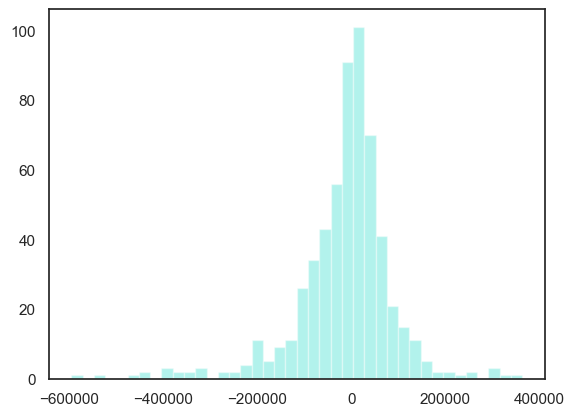

In [107]:
sns.distplot(test_resids, kde=False, bins=40, color = 'turquoise')
plt.show()

# The residuals looks ok and almost like a normal distribution

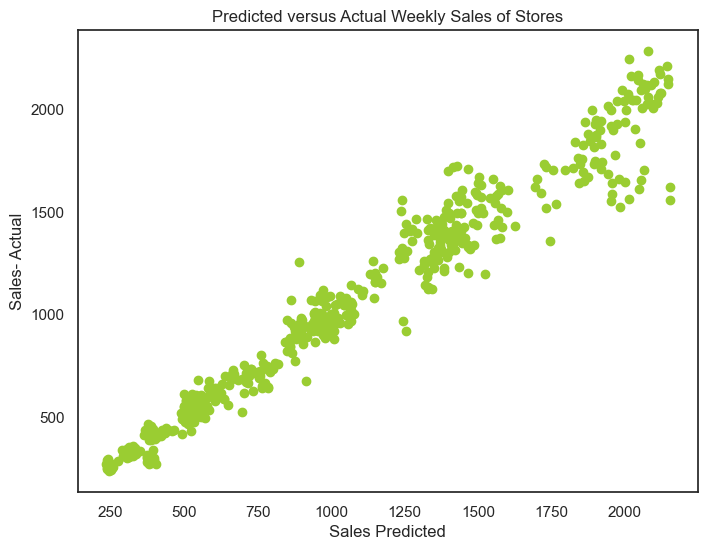

In [108]:
fig = plt.subplots(figsize=(8,6))
plt.scatter(lasso_yhat,y_test, c='yellowgreen')
plt.xlabel('Sales Predicted')
plt.ylabel('Sales- Actual')
plt.title('Predicted versus Actual Weekly Sales of Stores')
#plt.savefig('./images/Actual_vs_Predicted_Sales.png')
plt.show()

In [109]:
X_train = X_train[actual_predictors]
X_test = X_test[actual_predictors]

X_train_s=ss.fit_transform(X_train)
X_test_s=ss.fit_transform(X_test)

In [110]:
rfr=RandomForestRegressor(n_estimators=100, max_depth=None, max_features='auto')


In [111]:
# Fit and crossvalidate on train data
rfr.fit(X_train_s, y_train)
rfr_scores = cross_val_score(rfr, X_train_s, y_train, cv=10)
np.mean(rfr_scores)


0.9488432471021457

In [112]:
rfr_yhat = rfr.predict(X_test_s)
rfr_score=rfr.score(X_test_s, y_test)

print("R2: ",rfr_score)
rfr_adj_r2 = 1 - (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)*(1-rfr_score)
print("Adjusted R2: ",rfr_adj_r2)

R2:  0.7799984286911388
Adjusted R2:  0.758039703117938


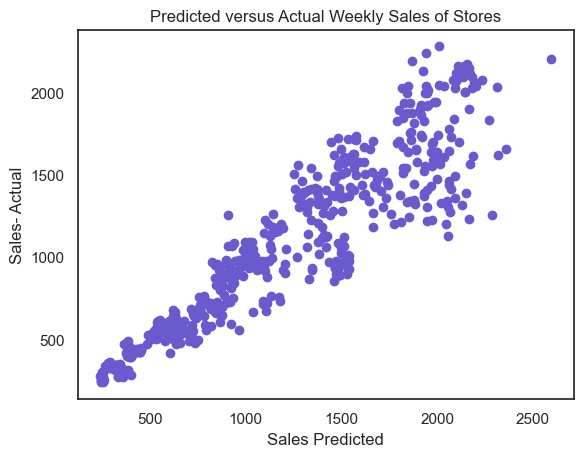

In [113]:
plt.scatter(rfr_yhat, y_test, color='slateblue')
plt.xlabel('Sales Predicted')
plt.ylabel('Sales- Actual')
plt.title('Predicted versus Actual Weekly Sales of Stores')
plt.show()

In [114]:
train_resids = y_train*1000 - rfr.predict(X_train_s)*1000
test_resids = y_test*1000 - rfr_yhat*1000
rfr_residue=np.abs(test_resids).sum()
# Let me look at the actual Residuals.
print("Train Residual",np.abs(train_resids).sum())
print("Test Residual",rfr_residue)
print("Residual ratio of Test to Train",np.abs(test_resids).sum()/np.abs(train_resids).sum())

Train Residual 150673023.6226999
Test Residual 93504870.29190001
Residual ratio of Test to Train 0.6205813625008643


In [115]:
gb = GradientBoostingRegressor(n_estimators=100,max_depth=10,learning_rate=0.1)

In [116]:
gb.fit(X_train_s, y_train)
gb_scores = cross_val_score(gb, X_train_s, y_train, cv=6)
np.mean(gb_scores)


0.953381039048542

In [117]:
gb_yhat=gb.predict(X_test_s)
gb_score=gb.score(X_test_s,y_test)

print("R2: ",gb_score)
gb_adj_r2 = 1 - (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)*(1-gb_score)
print("Adjusted R2: ",gb_adj_r2)

R2:  0.771599551921563
Adjusted R2:  0.7488025203807774


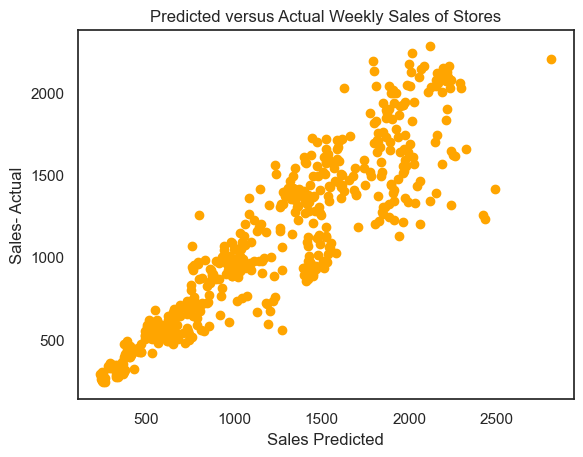

In [118]:
plt.scatter(gb_yhat, y_test, c='orange')
plt.xlabel('Sales Predicted')
plt.ylabel('Sales- Actual')
plt.title('Predicted versus Actual Weekly Sales of Stores')

plt.show()

In [119]:
train_resids = y_train*1000 - gb.predict(X_train_s)*1000
test_resids = y_test*1000 - gb_yhat*1000
gb_residue=np.abs(test_resids).sum()
# Let me look at the actual Residuals.
print("Train Residual",np.abs(train_resids).sum())
print("Test Residual",gb_residue)
print("Residual ratio of Test to Train",np.abs(test_resids).sum()/np.abs(train_resids).sum())

Train Residual 70612589.50101233
Test Residual 94258466.4165762
Residual ratio of Test to Train 1.334867720935583


In [120]:
svr=SVR(C=50000.0, max_iter=500)

svr.fit(X_train_s, y_train)

SVR(C=50000.0, max_iter=500)

In [121]:
svr_scores = cross_val_score(svr, X_train_s, y_train, cv=10)
np.mean(svr_scores)


0.583045094901611

In [122]:
svr_yhat=svr.predict(X_test_s)
svr_score=svr.score(X_test_s,y_test)
print("R2: ",svr_score)
svr_adj_r2 = 1 - (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)*(1-svr_score)
print("Adjusted R2: ",svr_adj_r2)

R2:  0.40465210542664776
Adjusted R2:  0.34522943421687813


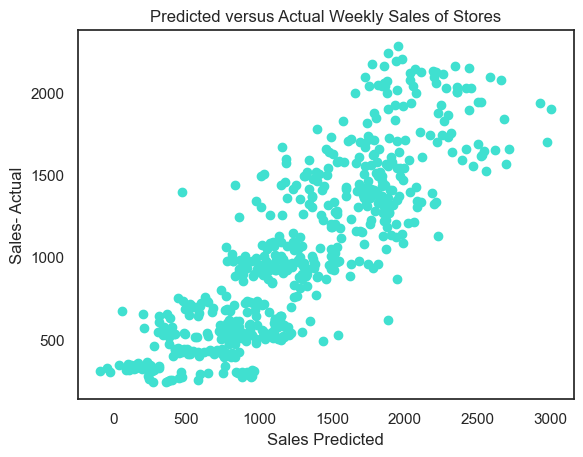

In [123]:
plt.scatter(svr_yhat, y_test, c='turquoise')
plt.xlabel('Sales Predicted')
plt.ylabel('Sales- Actual')
plt.title('Predicted versus Actual Weekly Sales of Stores')

plt.show()

In [124]:
train_resids = y_train*1000 - rfr.predict(X_train_s)*1000
test_resids = y_test*1000 - svr_yhat*1000
svr_residue=np.abs(test_resids).sum()
# Let me look at the actual Residuals.
print("Train Residual", np.abs(train_resids).sum())
print("Test Residual",svr_residue)
print("Residual ratio of Test to Train",np.abs(test_resids).sum()/np.abs(train_resids).sum())

Train Residual 150673023.6226999
Test Residual 192235311.08143732
Residual ratio of Test to Train 1.2758442517408657


In [125]:
Residual_graph=pd.DataFrame()
Residual_graph["Store"]=range(1,46)
Residual_graph['actual_y']=0
Residual_graph['predicted_lasso_y']=0

count=0
for x in y_test:
    count+=1
    Residual_graph['actual_y'][count%45]+=x

count=0
for x in lasso_yhat:
    count+=1
    Residual_graph['predicted_lasso_y'][count%45]+=x  

Residual_graph["actual_y"]=Residual_graph["actual_y"]/13
Residual_graph["predicted_lasso_y"]=Residual_graph["predicted_lasso_y"]/13

Residual_graph["Residual_lasso"]=np.abs(Residual_graph["actual_y"] - Residual_graph["predicted_lasso_y"])
Residual_graph["Residual_lasso_percentage"]=(Residual_graph["Residual_lasso"]/Residual_graph["actual_y"])*100

In [126]:
# Setting the size of bubble according to the percentage change in prediction
s=Residual_graph.Residual_lasso_percentage.values
s=s*100

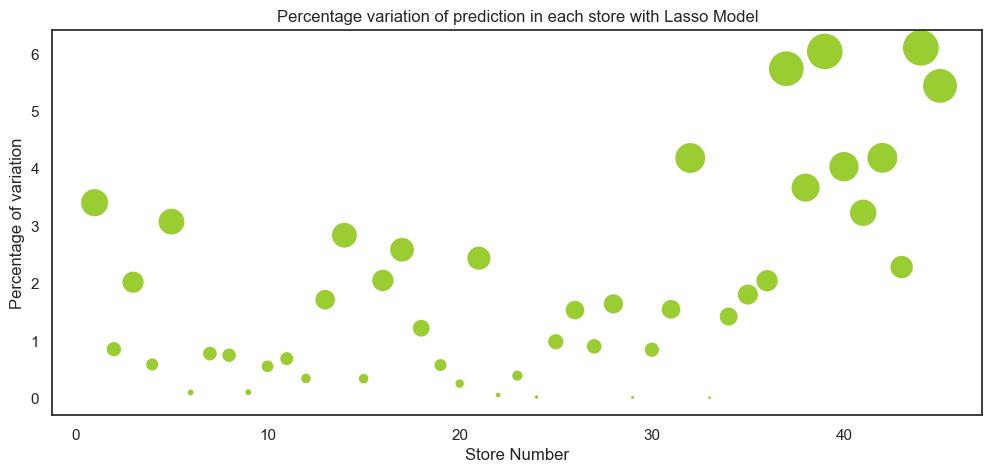

In [127]:
fig = plt.subplots(figsize=(12,5))
plt.scatter(Residual_graph.Store, Residual_graph.Residual_lasso_percentage, s=s, color = 'yellowgreen')
plt.xlabel('Store Number')
plt.ylabel('Percentage of variation')
plt.title('Percentage variation of prediction in each store with Lasso Model')
#plt.savefig('./images/percentage_prediction_variation.png')
plt.show()

In [128]:
# Create a dataframe to compare different models
Score=pd.DataFrame()
Score["Model_Name"]=('Lasso','RandomForest','GradientBoosting','SupportVector')
Score["Test_Score"]=(lasso_score,rfr_score,gb_score,svr_score)
Score["Adj_R2"]=(lasso_adj_r2,rfr_adj_r2,gb_adj_r2,svr_adj_r2)
Score["Test_Residual"]=(lasso_residue,rfr_residue,gb_residue,svr_residue)

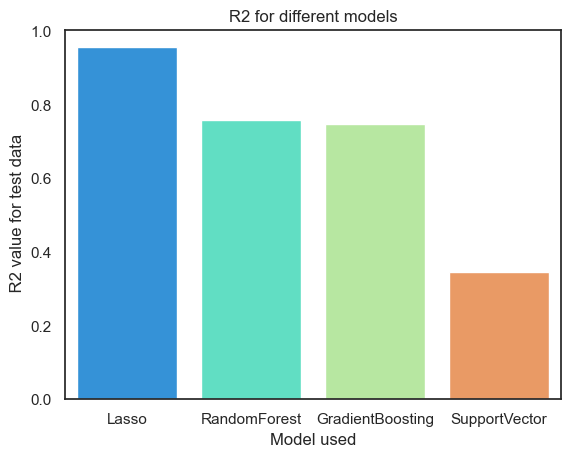

In [129]:
# Checking how the Type of the store have effect on the sales.
sns.barplot(x="Model_Name", y="Adj_R2", data=Score,orient='v', palette='rainbow')
plt.xlabel('Model used')
plt.ylabel(' R2 value for test data')
plt.title('R2 for different models')
#plt.savefig('./images/R2_for_different_models.png')
plt.show()

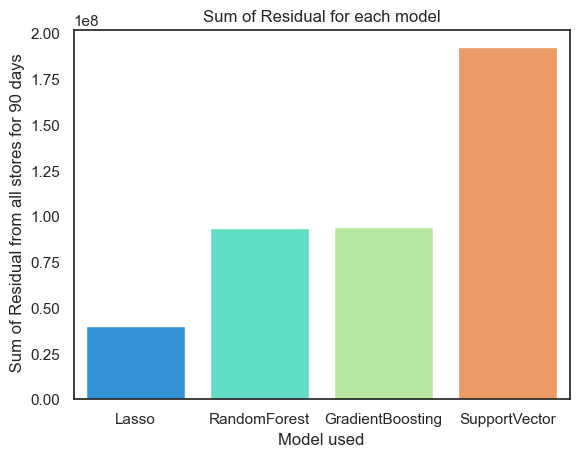

In [130]:
sns.barplot(x="Model_Name", y="Test_Residual", data=Score,orient='v', palette='rainbow')
plt.xlabel('Model used')
plt.ylabel(' Sum of Residual from all stores for 90 days')
plt.title('Sum of Residual for each model')
#plt.savefig('./images/Residual_for_different_models.png')
plt.show()

Lasso:CROSS_Validation


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Accuracy: 72.89290358980398
Mean Absolute Error: 213.55396068501003
Mean Squared Error: 75503.16990398787
Root Mean Squared Error: 274.7784014510381


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.8s finished


<AxesSubplot:>

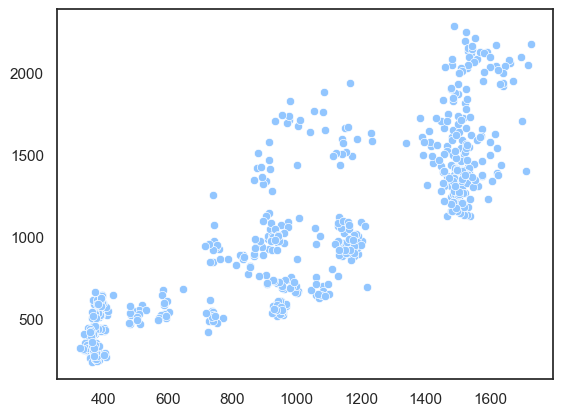

In [131]:
print('Lasso:CROSS_Validation')
laCV = LassoCV(n_alphas=1000,max_iter=2000, cv=10, verbose=1)        
laCV.fit(X_train,y_train)
y_pred = laCV.predict(X_test)
print('Accuracy:',laCV.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test)


Lasso:
Accuracy: 95.41390345203031
Mean Absolute Error: 80.61385299758814
Mean Squared Error: 12773.954894232189
Root Mean Squared Error: 113.02192218429215


<AxesSubplot:>

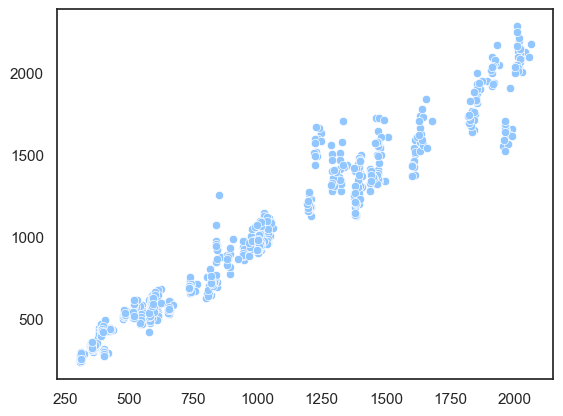

In [132]:
print('Lasso:')
la = Lasso()        
la.fit(X_train,y_train)
y_pred = la.predict(X_test)
print('Accuracy:',la.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test)


Random Forest Regressor:
Accuracy: 96.90479570567348
Mean Absolute Error: 63.36843330583888
Mean Squared Error: 8621.275115035385
Root Mean Squared Error: 92.85082183284855


<AxesSubplot:>

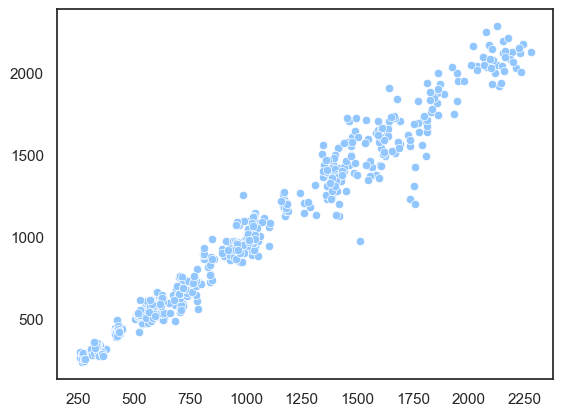

In [133]:
print('Random Forest Regressor:')
rfr = RandomForestRegressor(n_estimators=400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test)

DecisionTreeRegressor:
Accuracy: 90.71156148717427
Mean Absolute Error: 93.05355806837606
Mean Squared Error: 25871.69575686601
Root Mean Squared Error: 160.84680835150573


<AxesSubplot:>

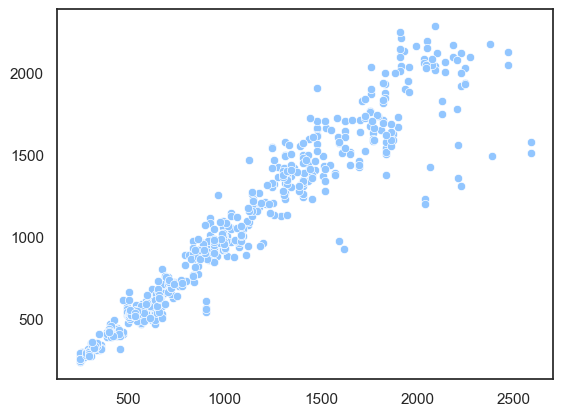

In [134]:
print('DecisionTreeRegressor:')
dtr = DecisionTreeRegressor(random_state=0)        
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
print('Accuracy:',dtr.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test)

Linear Regression:
Accuracy: 93.52683844486664
Mean Absolute Error: 71.67415482477632
Mean Squared Error: 10837.515962164262
Root Mean Squared Error: 104.10339073327181


<AxesSubplot:>

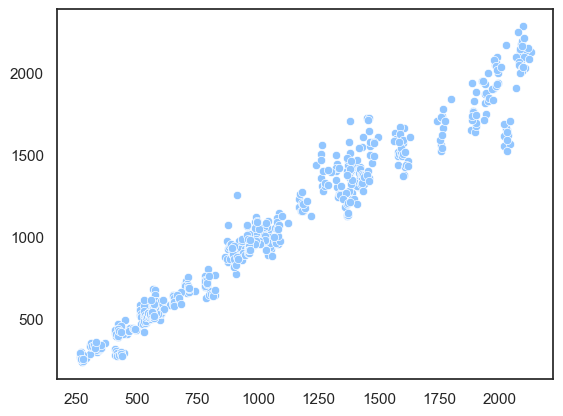

In [135]:
print('Linear Regression:')
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test)

Gradient_Boosting Regressor:
Accuracy: 99.99978153911931
Mean Absolute Error: 88.67712143106657
Mean Squared Error: 16290.620939823746
Root Mean Squared Error: 127.63471682823504


<AxesSubplot:>

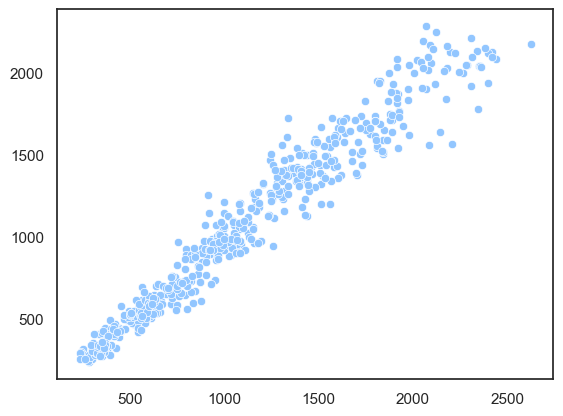

In [136]:
print("Gradient_Boosting Regressor:")
gbr=GradientBoostingRegressor(n_estimators=500,max_depth=6,learning_rate=0.5)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print('Accuracy:',gbr.score(X_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test)

SVR
Accuracy: 58.651078756804
Mean Absolute Error: 233.16634598131935
Mean Squared Error: 100109.41100411657
Root Mean Squared Error: 316.4007127111388


<AxesSubplot:>

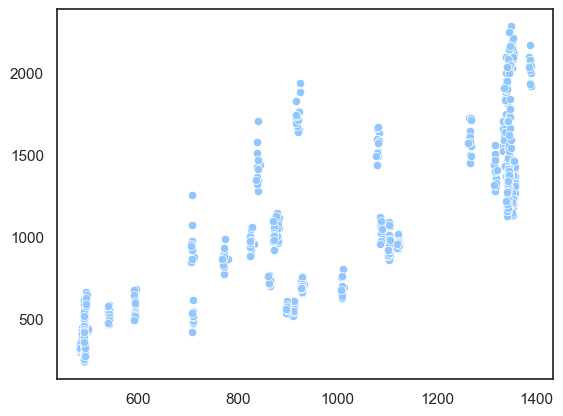

In [137]:
print("SVR")
svr=SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('Accuracy:',svr.score(X_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test)

XGBREGRESSOR
Accuracy: 99.5759989317978
Mean Absolute Error: 64.47748494062166
Mean Squared Error: 8454.694748921318
Root Mean Squared Error: 91.94941407600876


<AxesSubplot:>

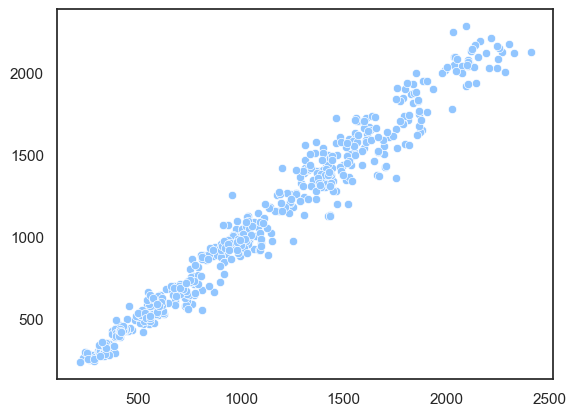

In [138]:
print("XGBREGRESSOR")
XGB=XGBRegressor()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
print('Accuracy:',XGB.score(X_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test)
